In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
! tar -xzf cis_contacts.tar.gz

## Triads scaling

In [2]:
def draw_chr(file, pc, exp, org):
    df = pd.read_table(file, header=None).rename(
        columns={0:"rna_chr", 1:"rna_start", 2:"rna_end", 
                 3:"rna_strand", 4:"dna_chr", 5:"dna_start",
                 6:"dna_end"})

    chrlist_human = ["chr" + str(ind) for ind in [*range(1,23), "X"]]
    chrlist_mouse = ["chr" + str(ind) for ind in [*range(1,20), "X", "Y"]]

    chrlist_choice = chrlist_human if org == "K562" else chrlist_mouse
    
    title_pc = "with mRNA" if pc else "no mRNA"

    fig, axs = plt.subplots(6, 4, figsize=(20, 20))
    plt.style.use("seaborn-v0_8-whitegrid")
    for ind, chrom in enumerate(chrlist_choice):
        tmp_df = df.query(f"rna_chr == '{chrom}'")
        axs[ind // 4, ind % 4].hist(np.abs(tmp_df.rna_start - tmp_df.dna_start),
                                    ec="navy", color="lightblue")
        axs[ind // 4, ind % 4].title.set_text(chrom)
    plt.suptitle(f"{exp}, {title_pc}", fontsize=40)
    plt.show()
    
    return

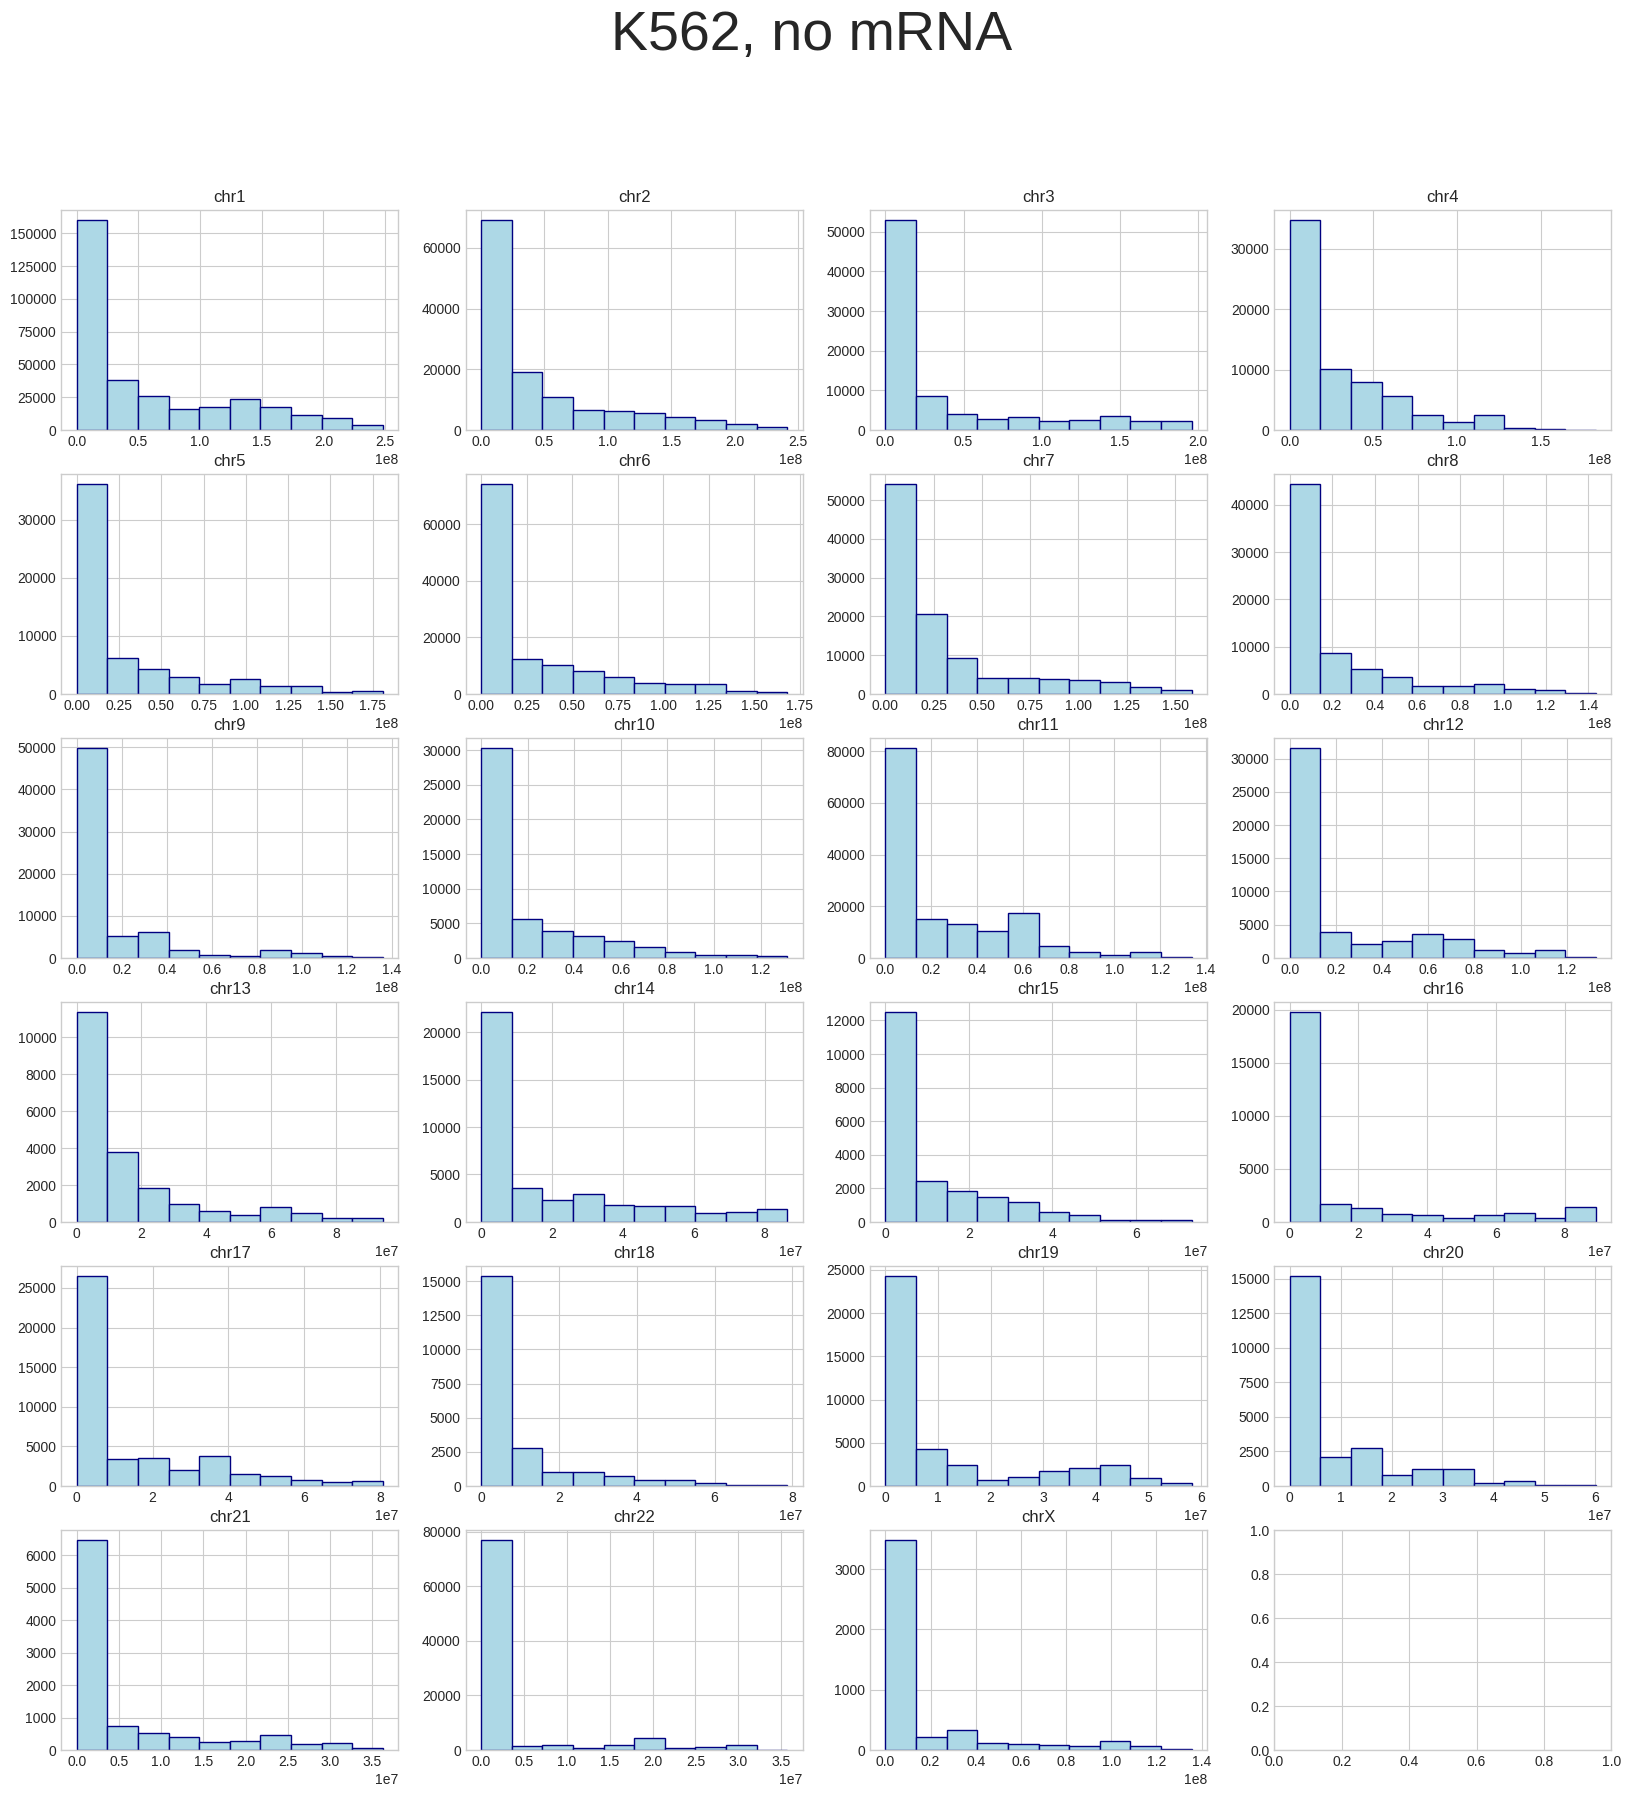

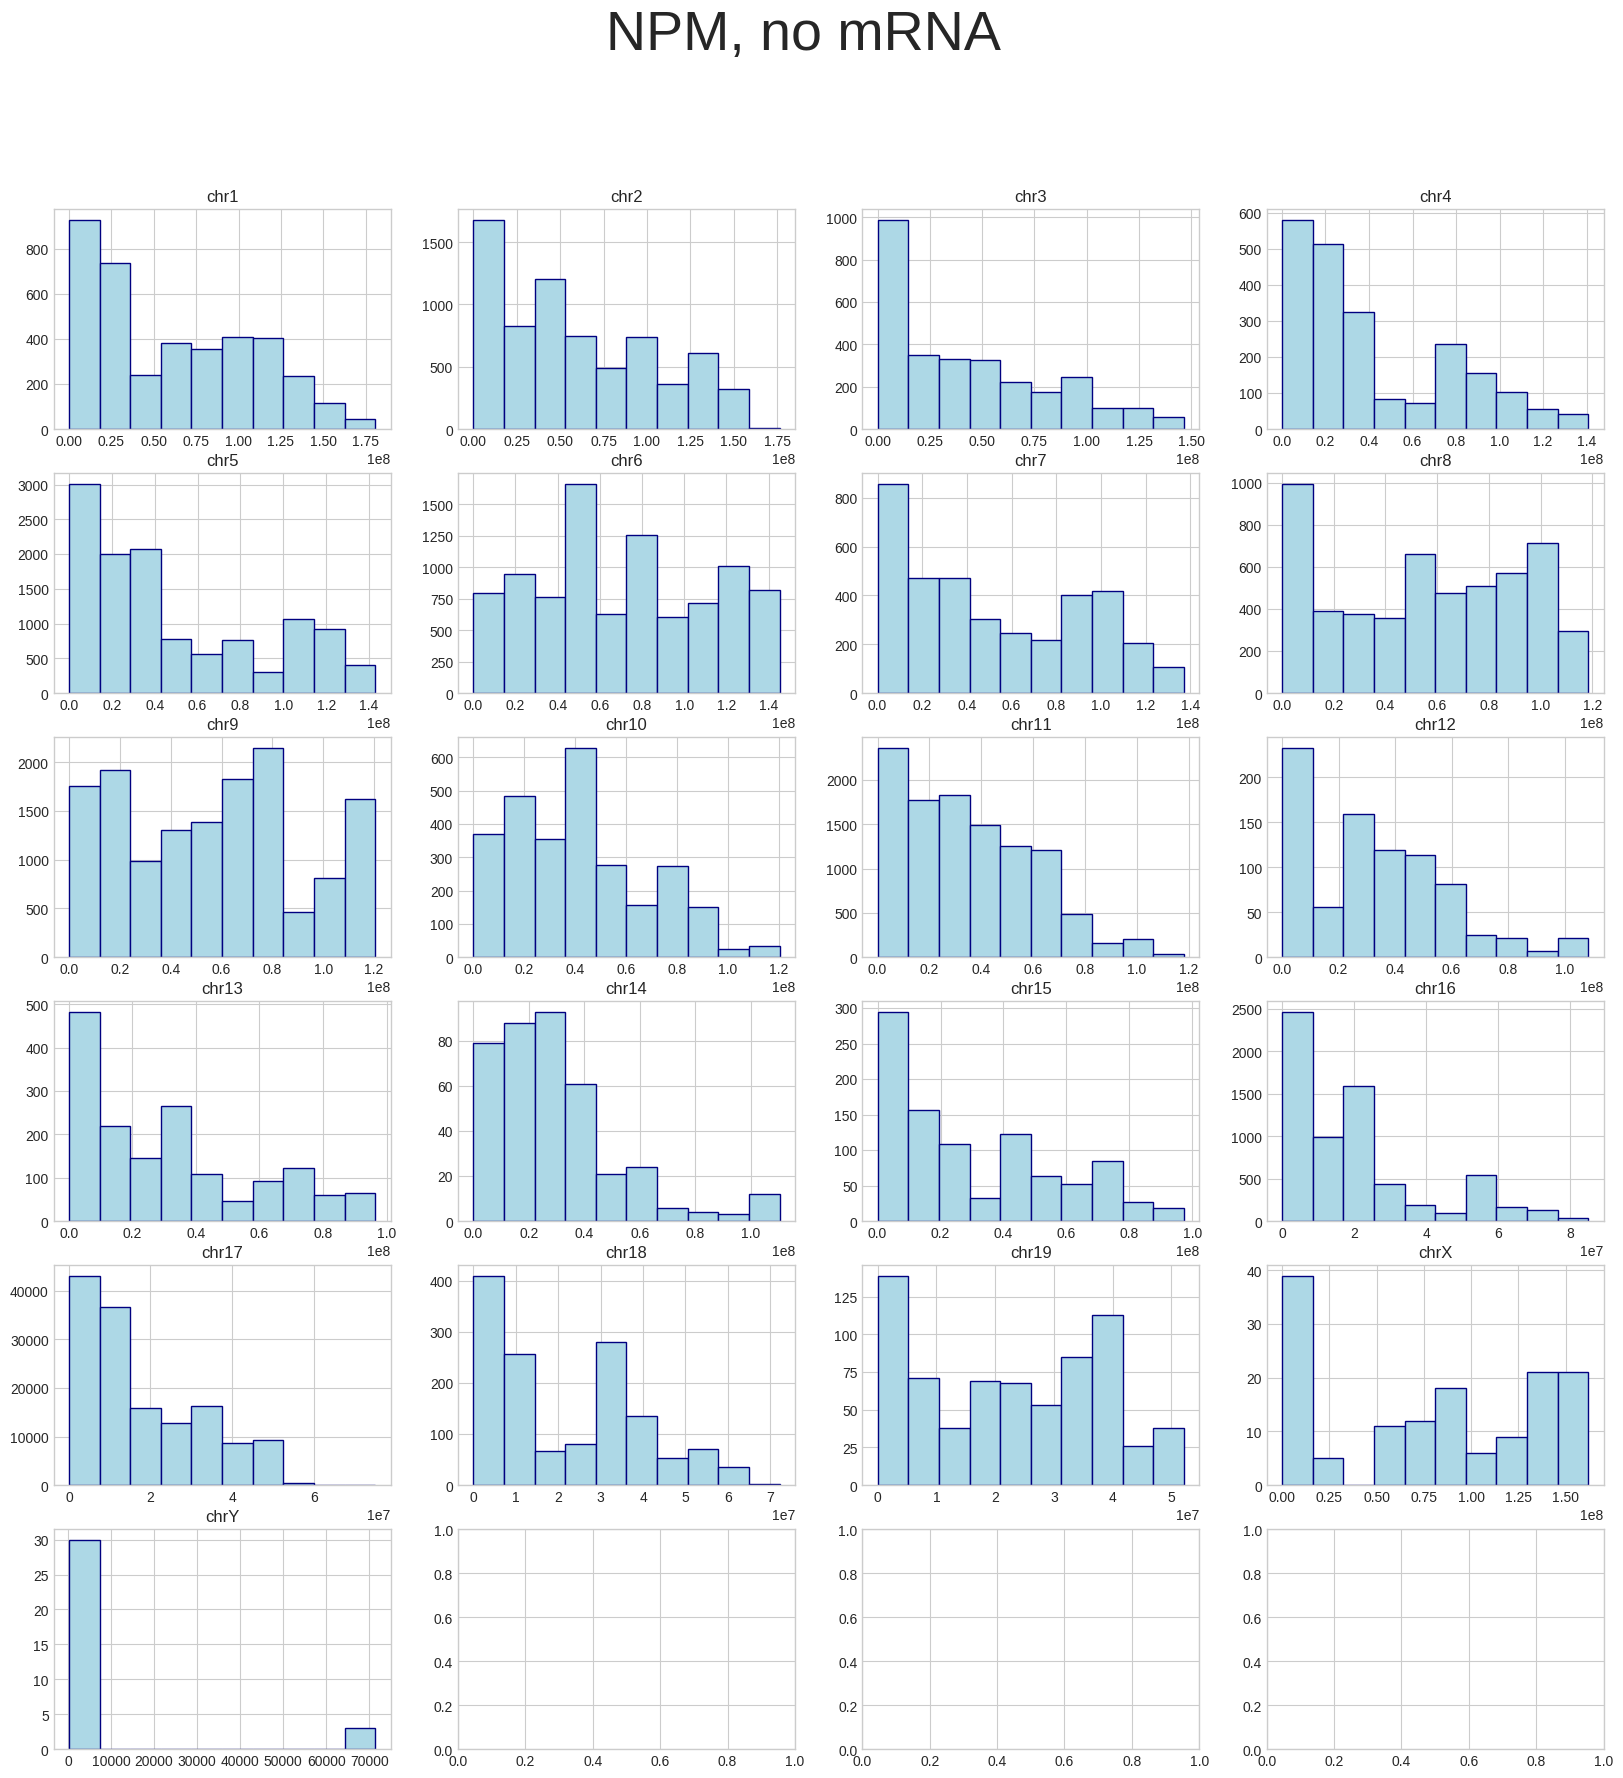

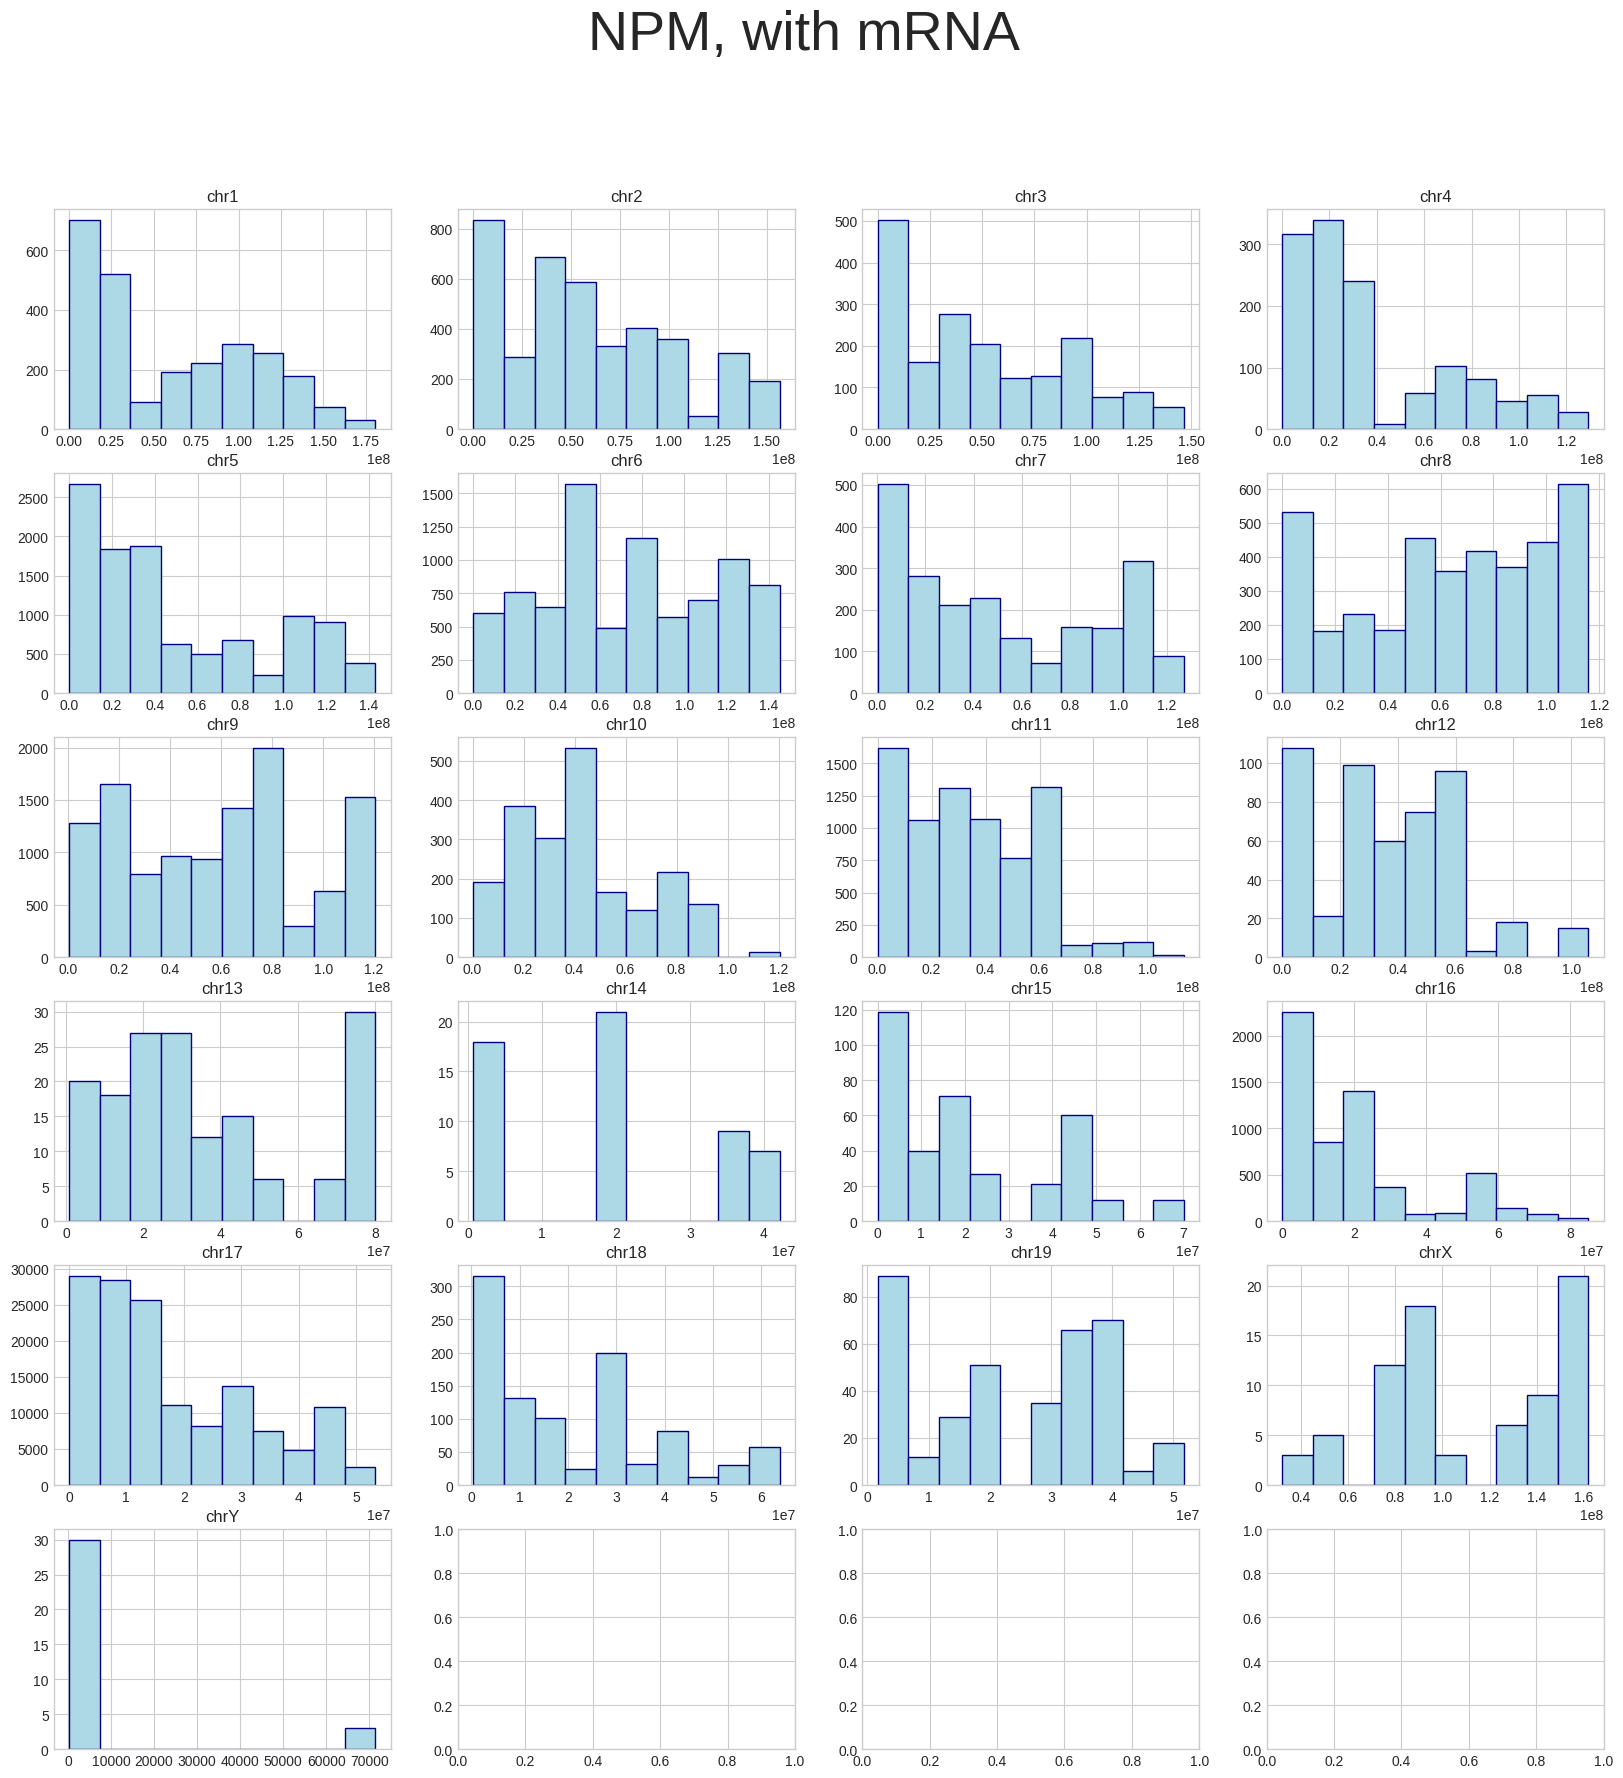

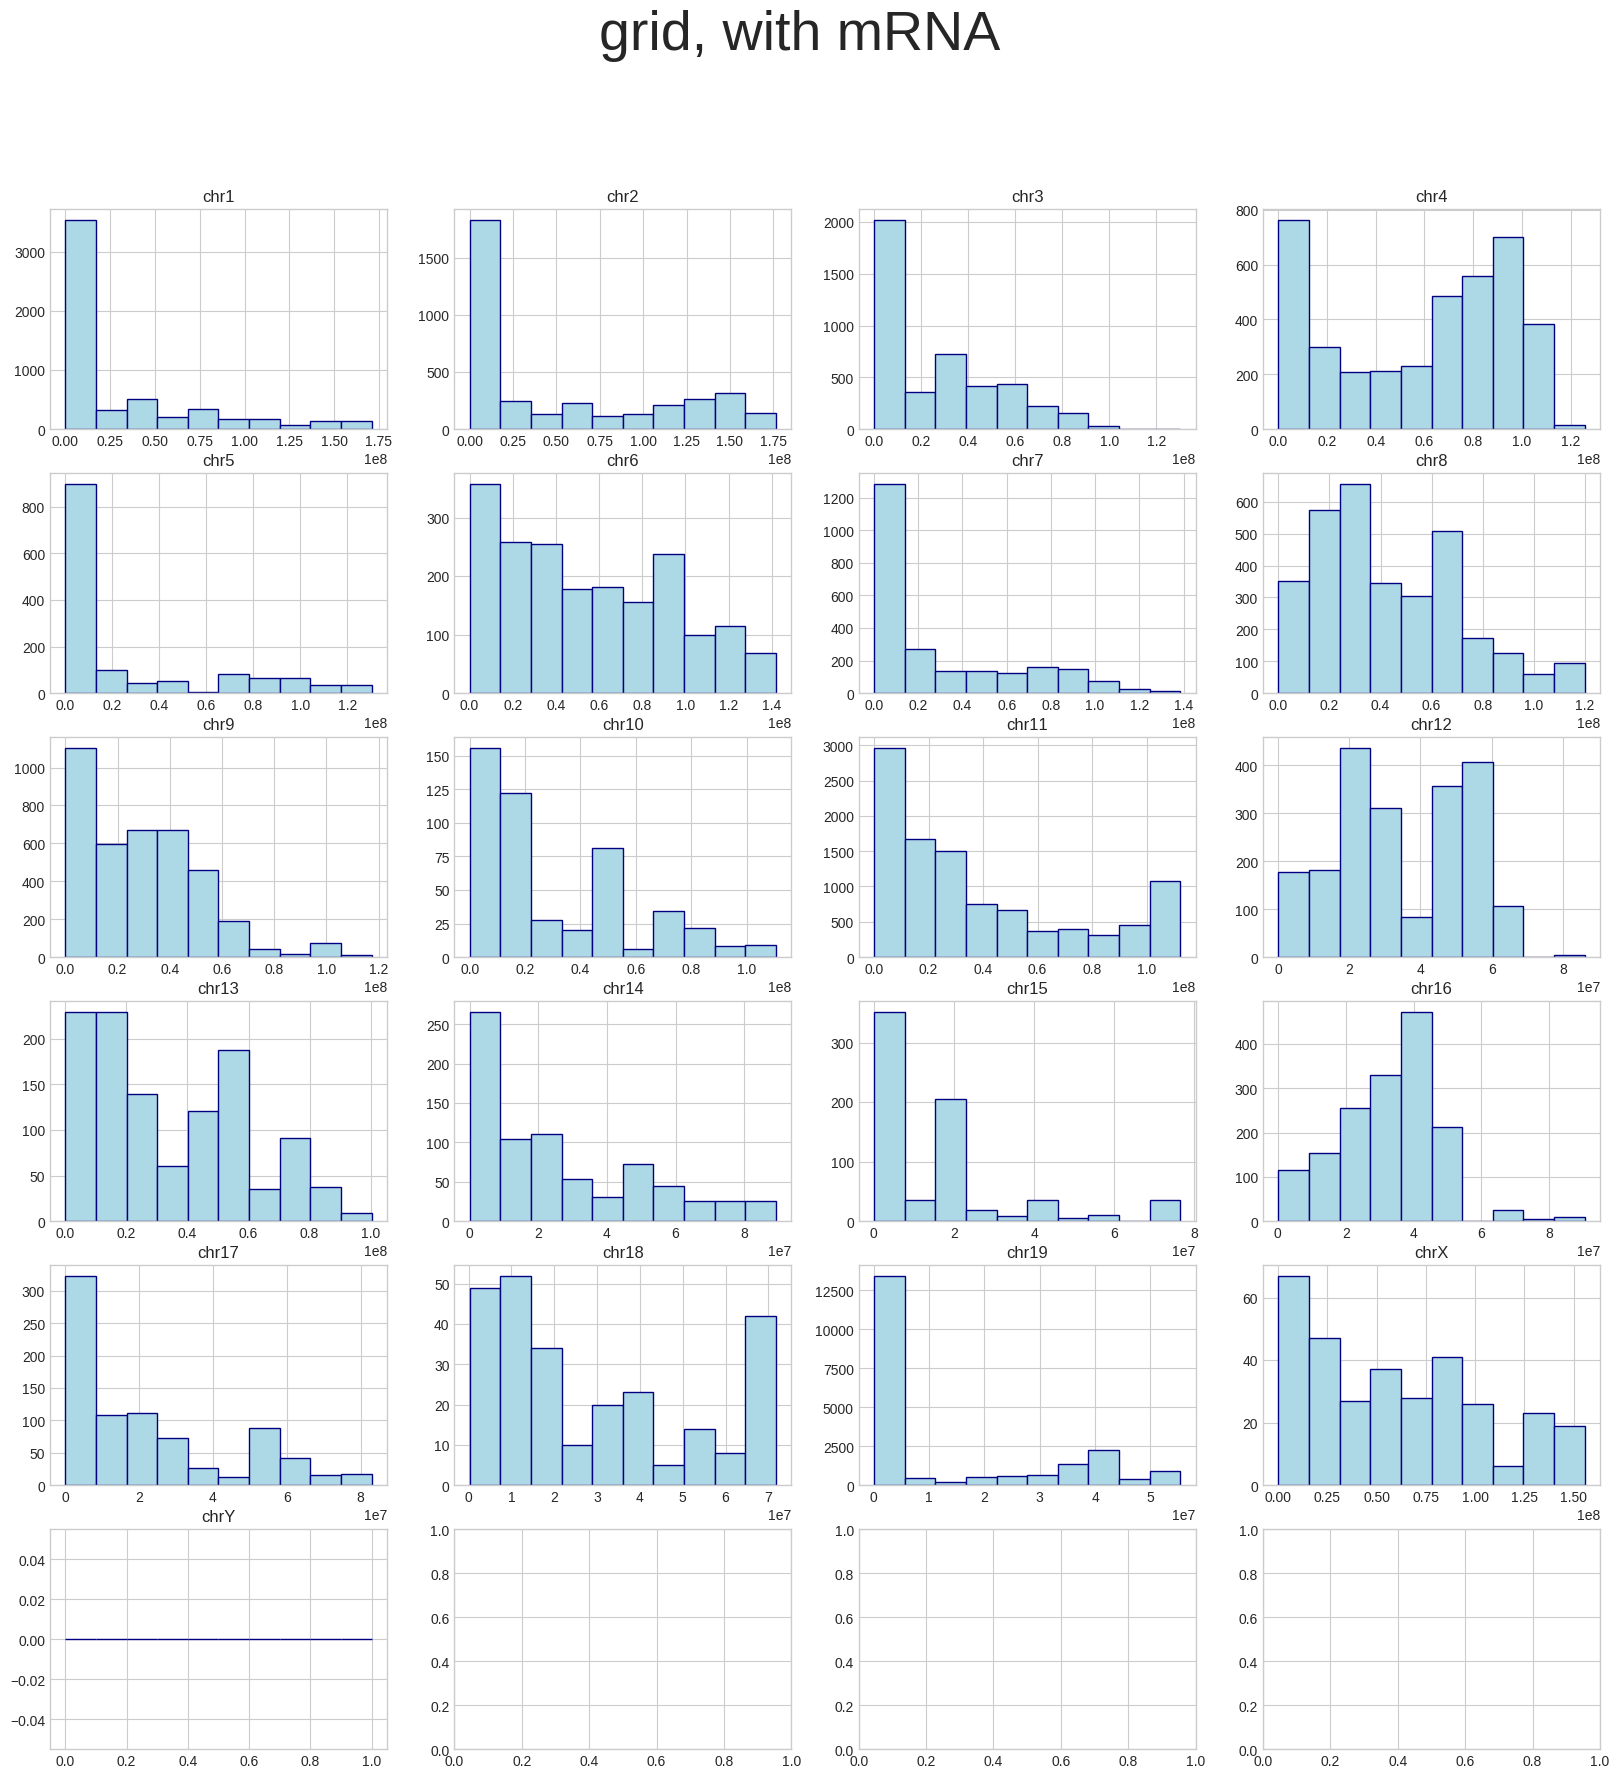

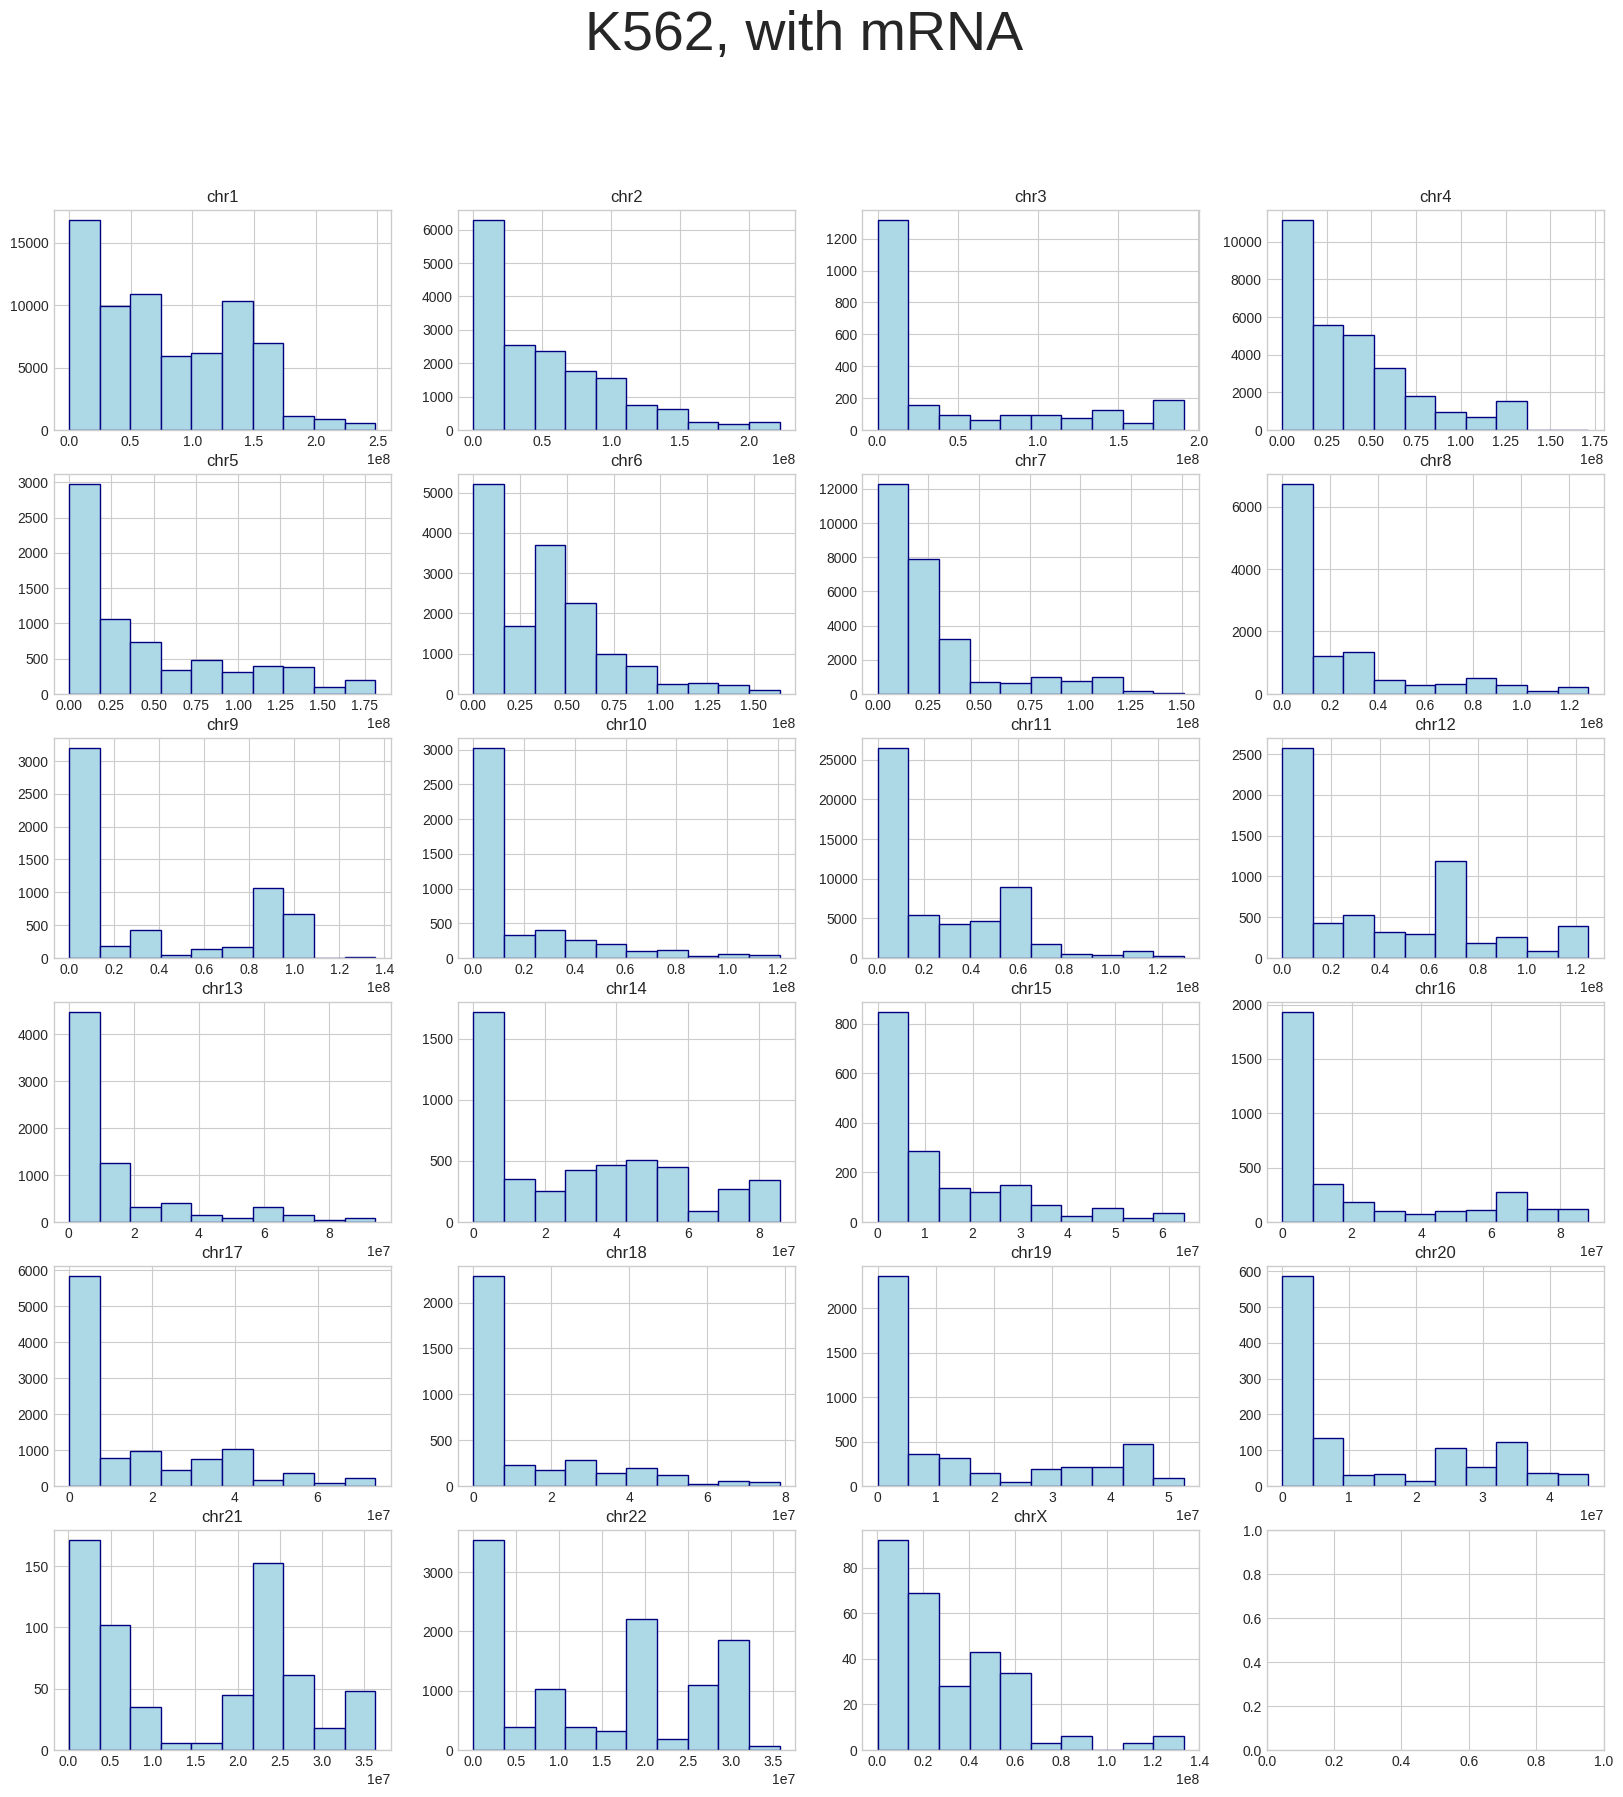

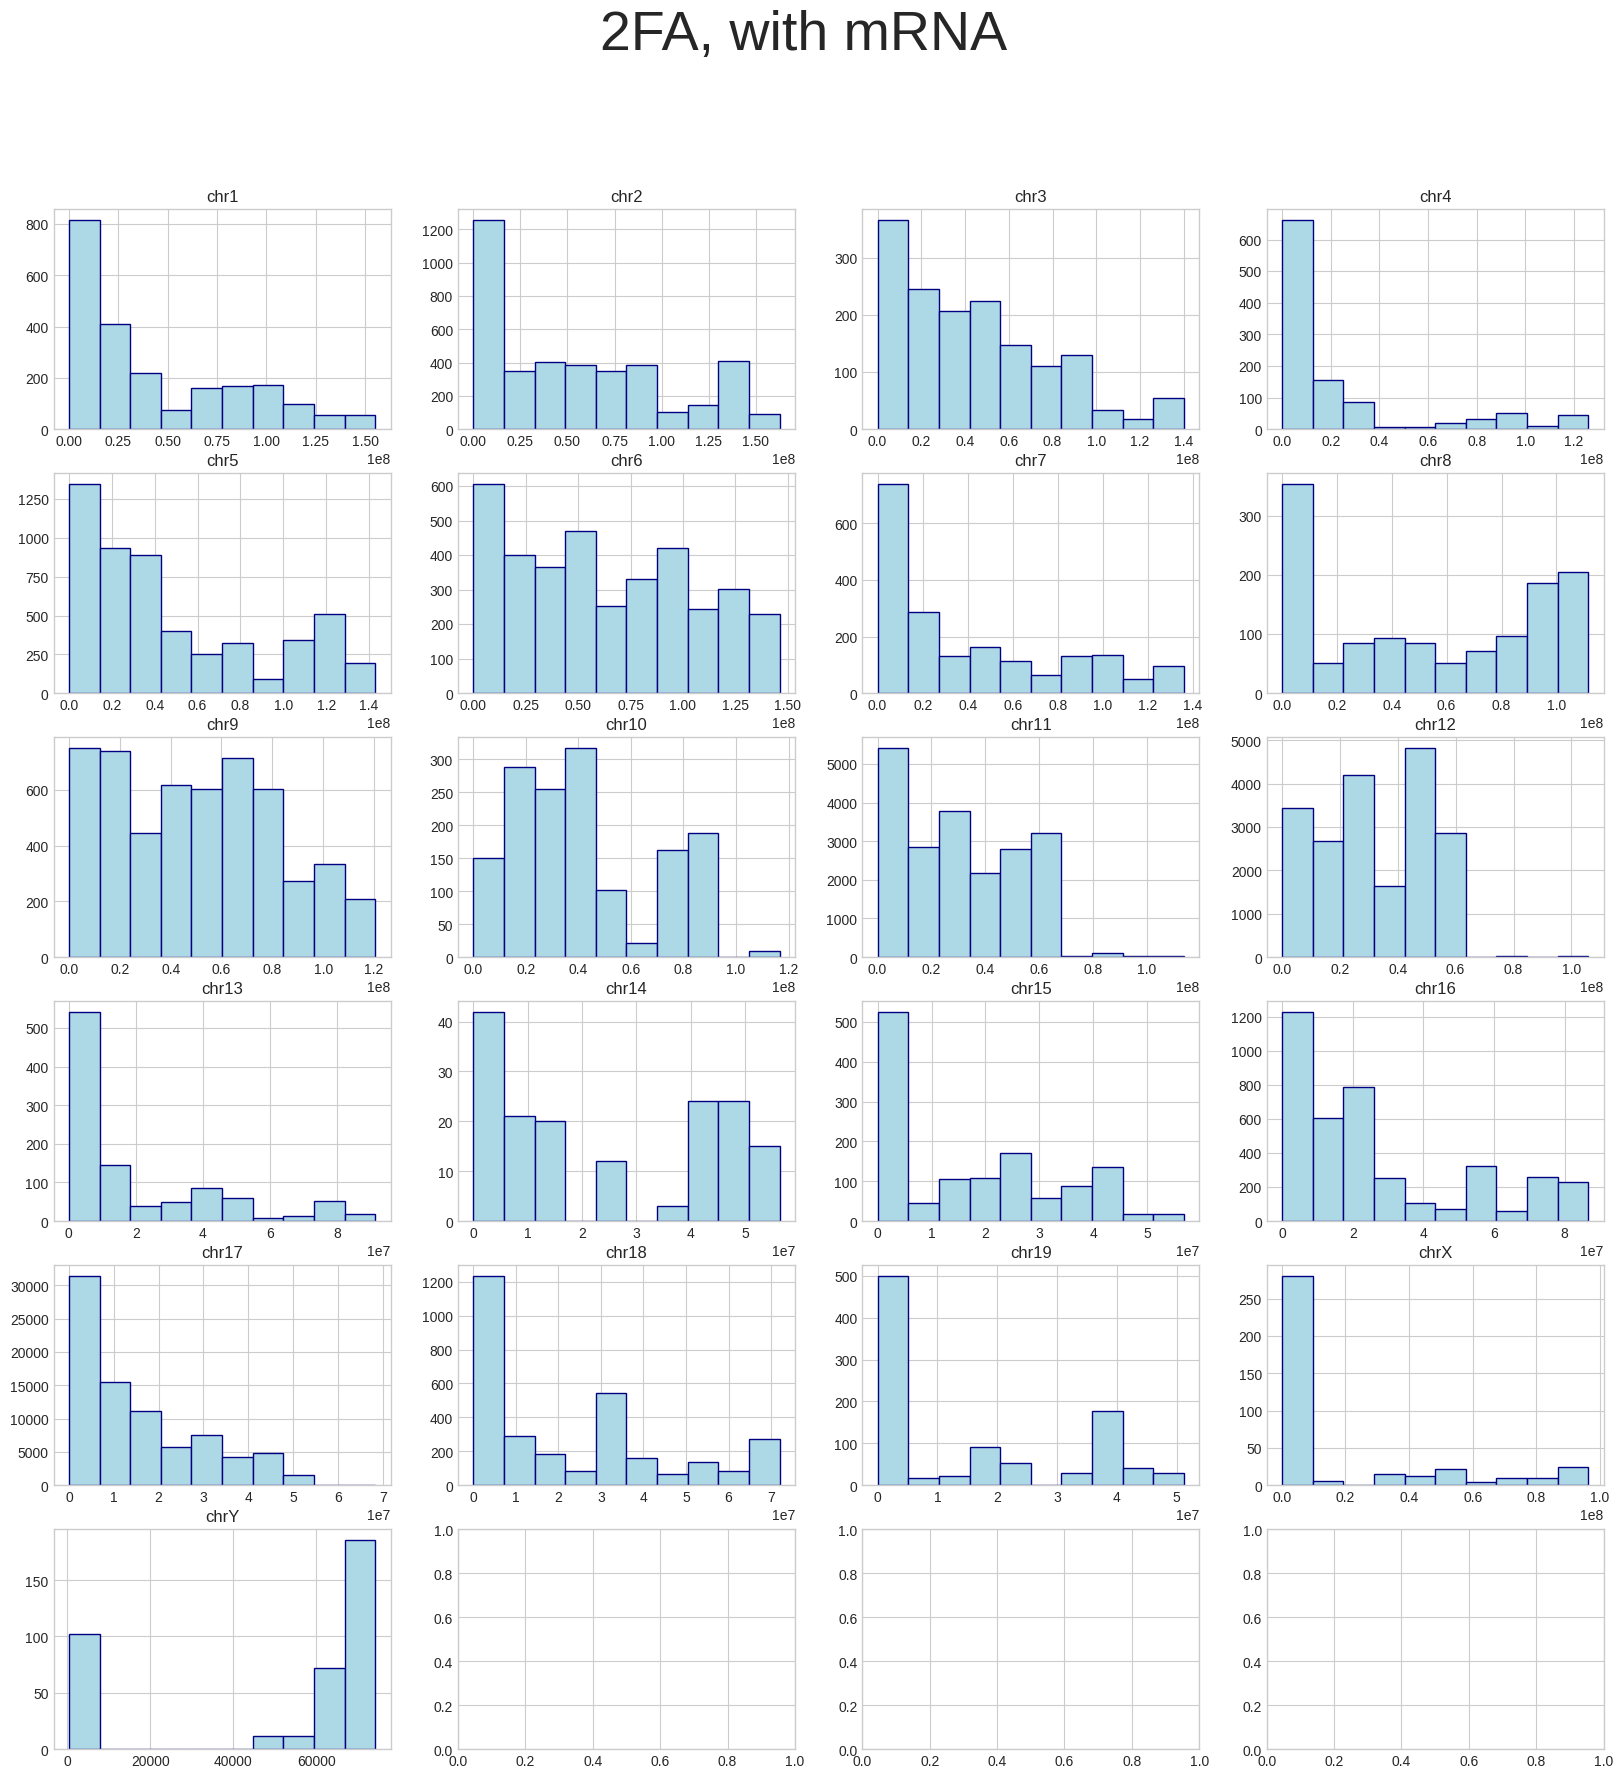

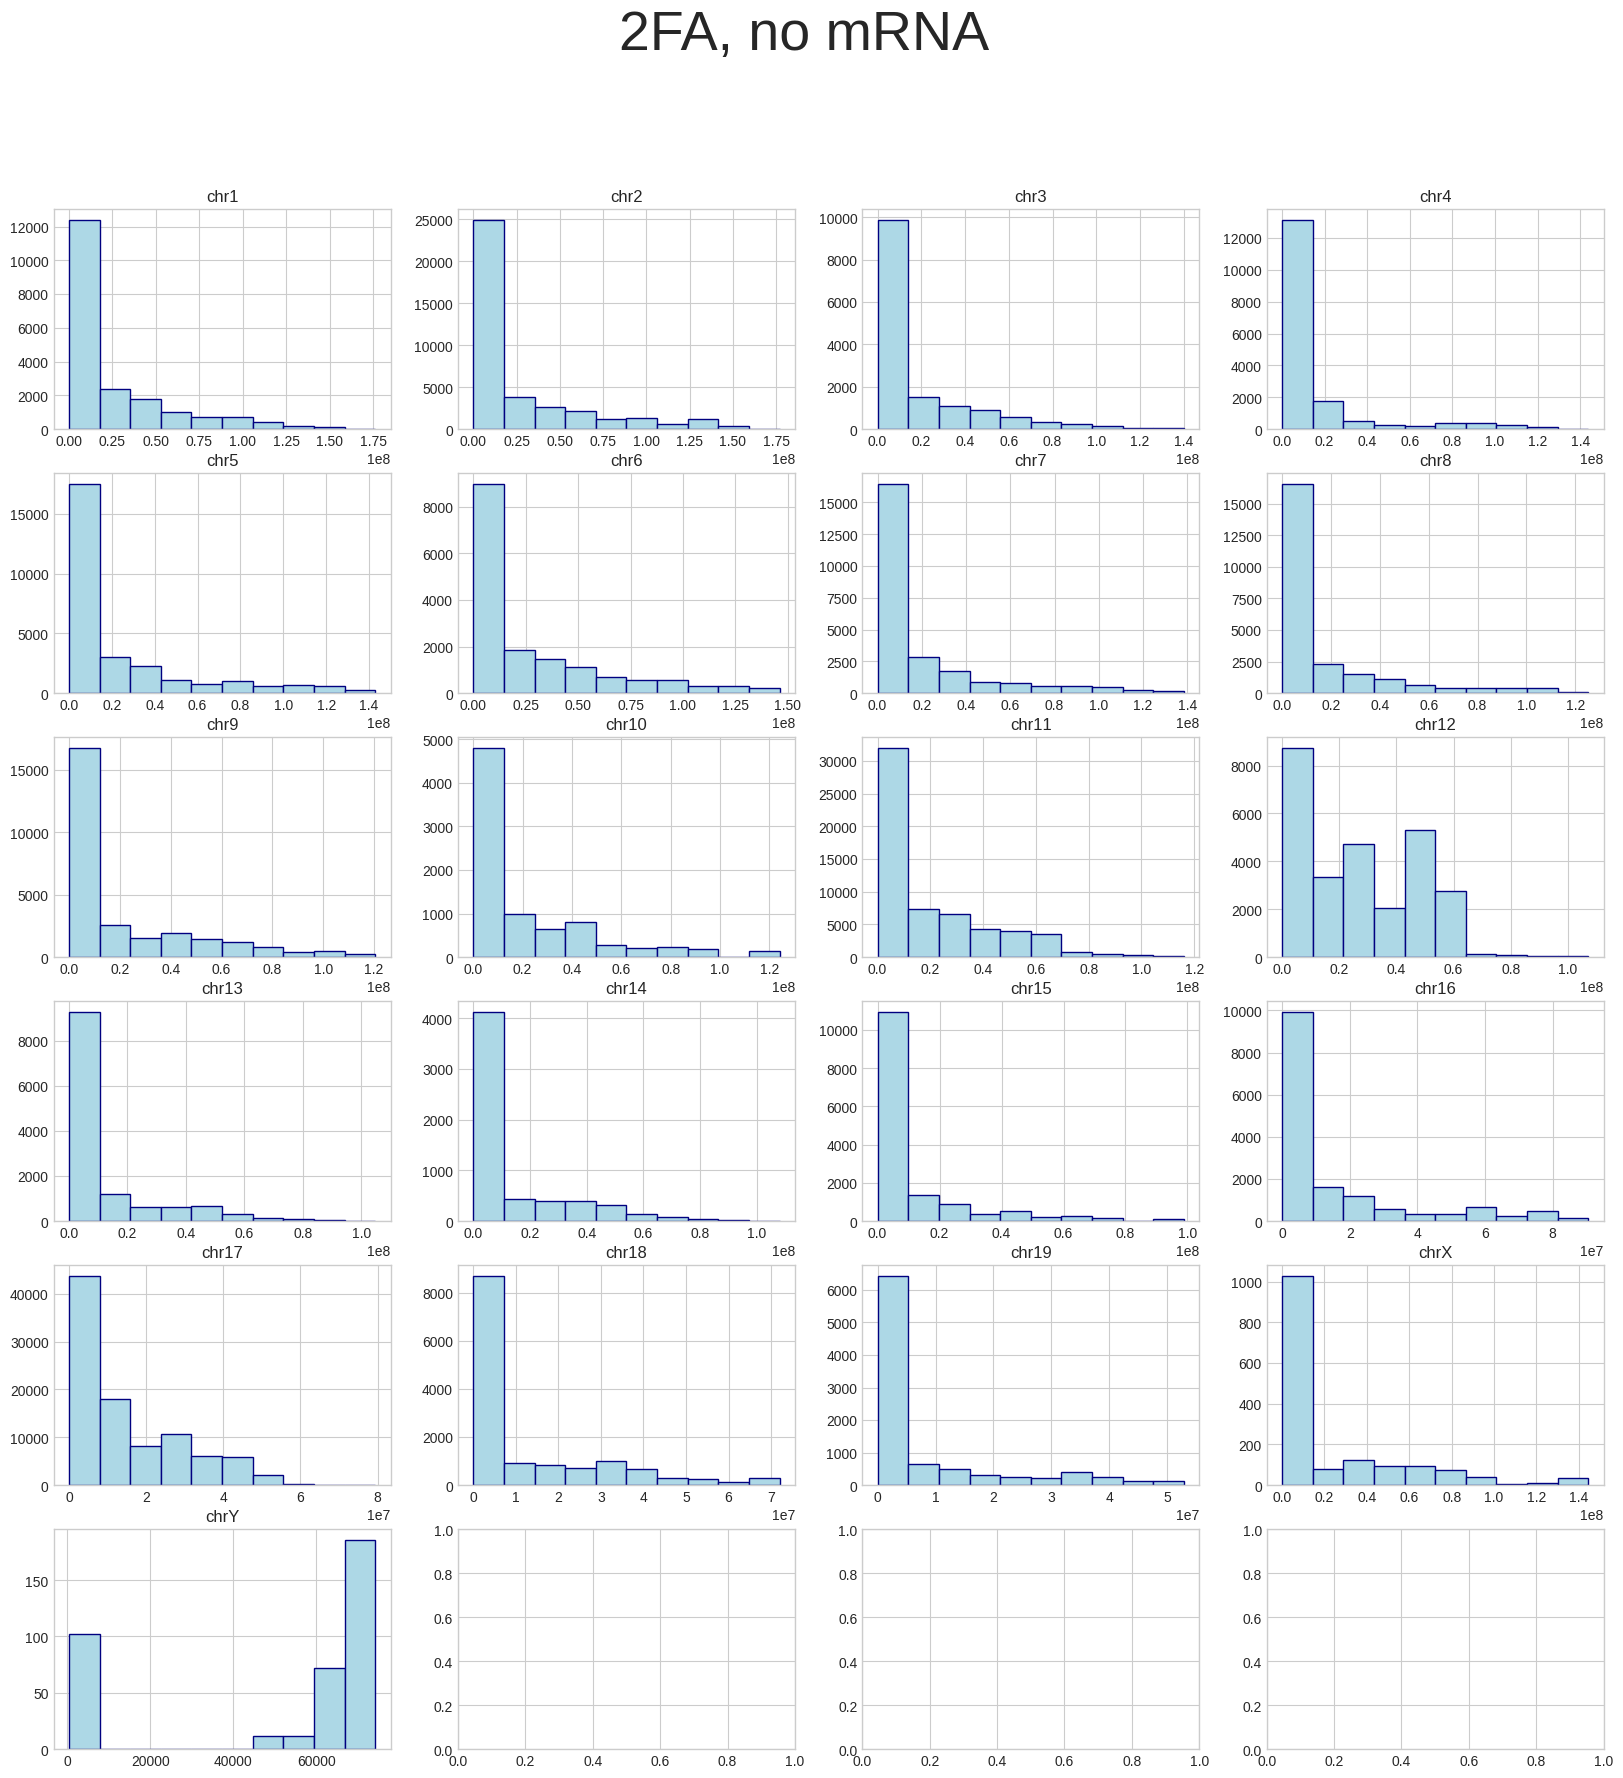

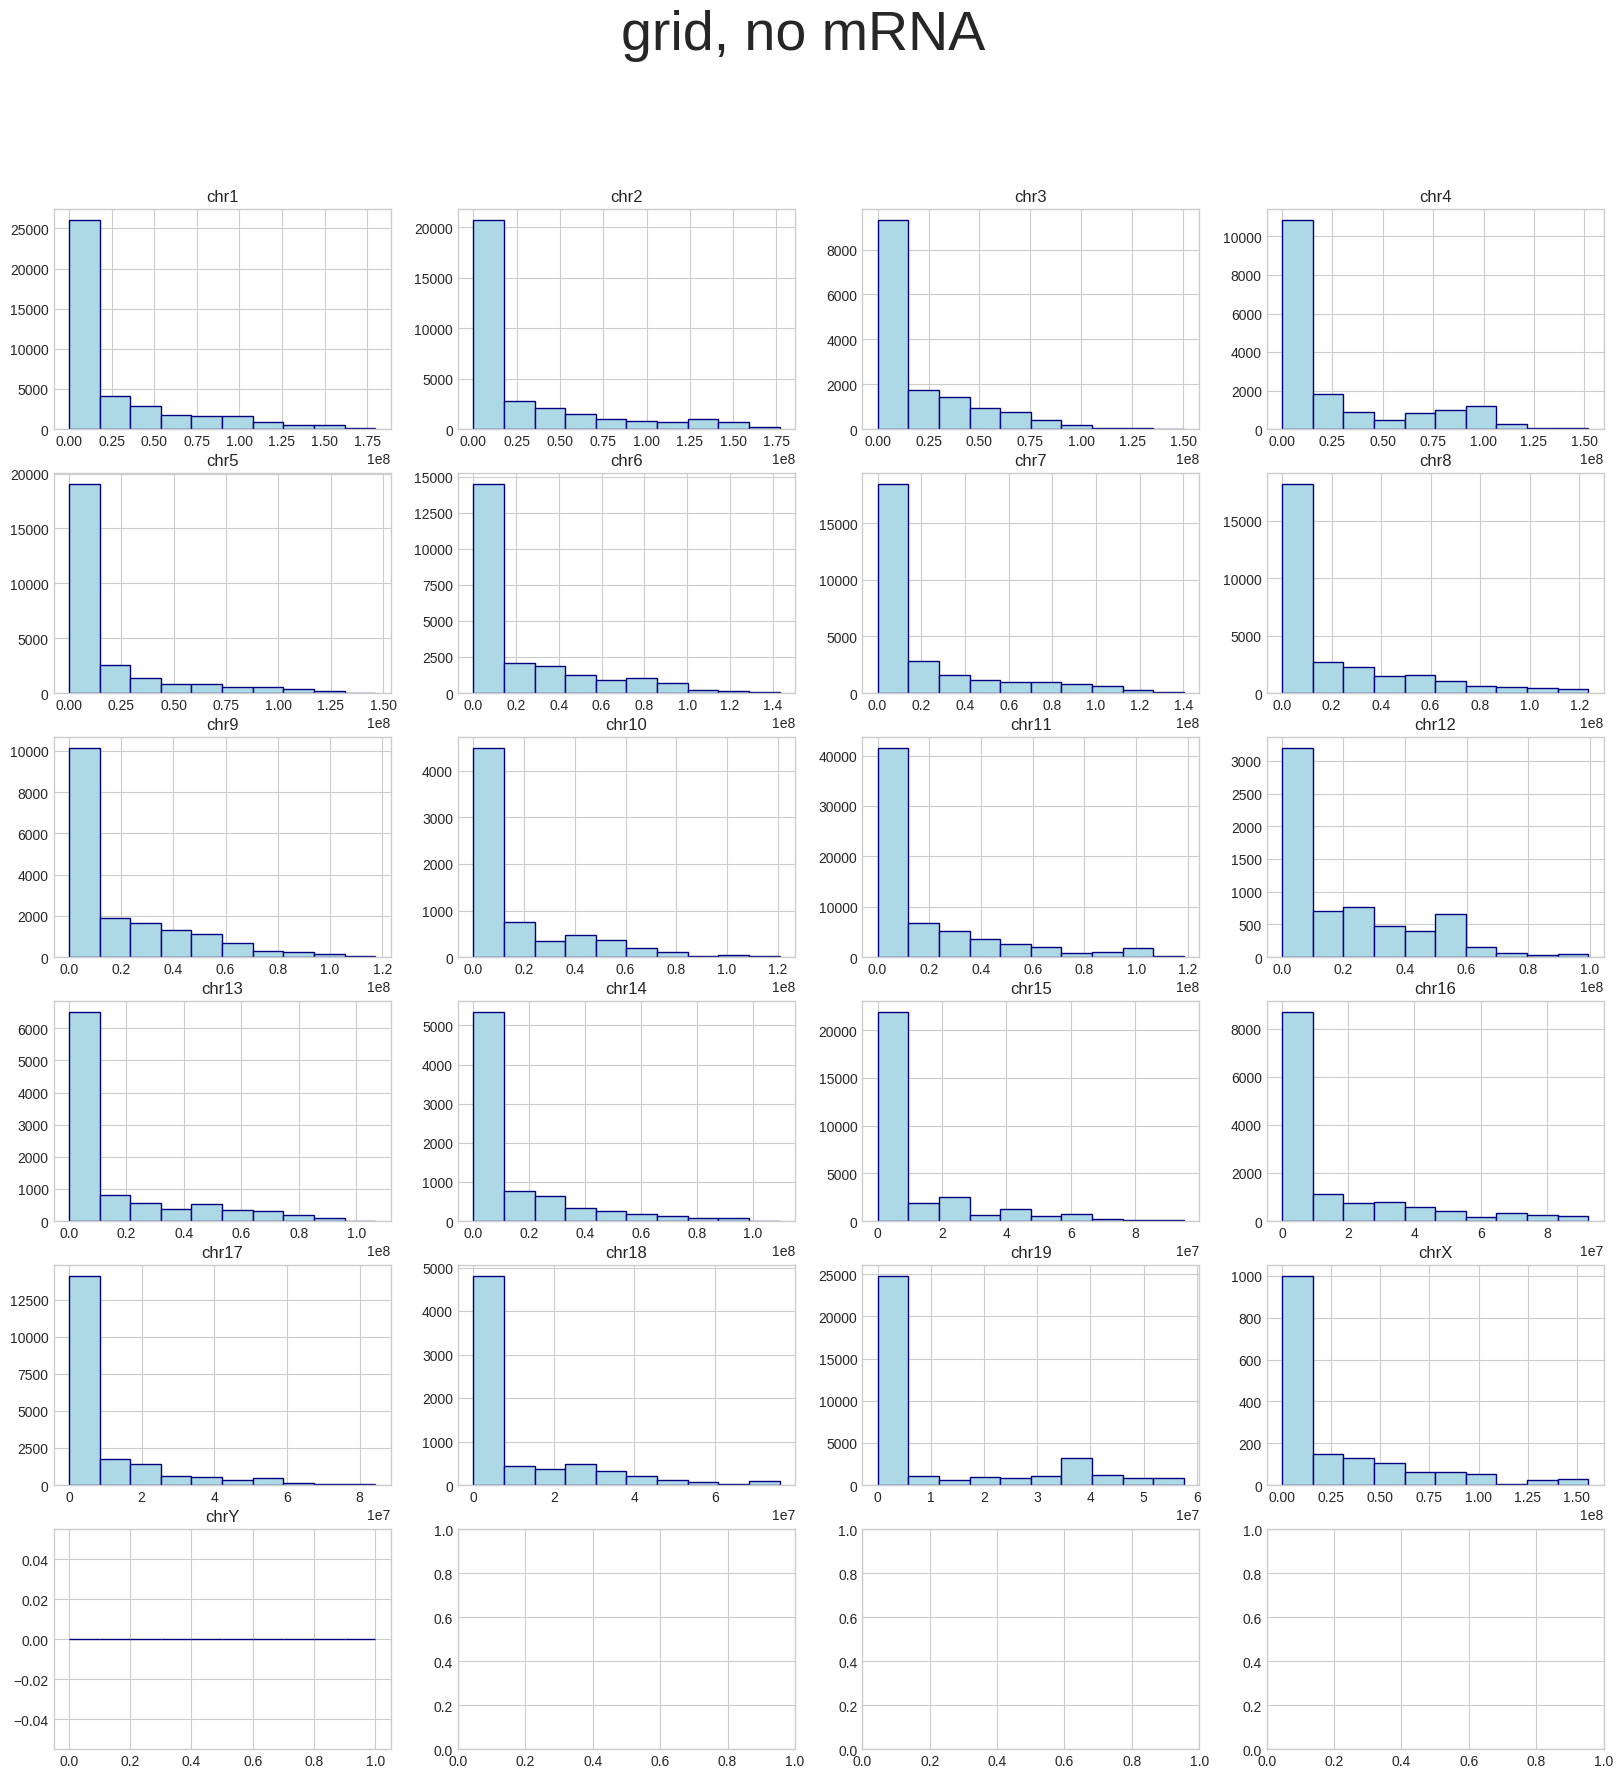

In [8]:
for fname in glob.glob("*tsv"):
    prot_cd = fname.find("no_mRNA") != -1
    experiment = fname.split('.')[0].split('_')[-1]
    organism = "K562" if experiment == "K562" else "mESC"
    
    draw_chr(fname, prot_cd, experiment, organism)
    

In [10]:
def draw_full(file, pc, exp, org):
    df = pd.read_table(file, header=None).rename(
        columns={0:"rna_chr", 1:"rna_start", 2:"rna_end", 
                 3:"rna_strand", 4:"dna_chr", 5:"dna_start",
                 6:"dna_end"})

    chrlist_human = ["chr" + str(ind) for ind in [*range(1,23), "X"]]
    chrlist_mouse = ["chr" + str(ind) for ind in [*range(1,20), "X", "Y"]]

    chrlist_choice = chrlist_human if org == "K562" else chrlist_mouse
    
    title_pc = "with mRNA" if pc else "no mRNA"
    
    plt.figure(figsize=(10, 8))
    plt.hist(np.abs(df.rna_start - df.dna_start),
                                ec="navy", color="lightblue")
    plt.title(f"{exp}, {title_pc}")
    
    return

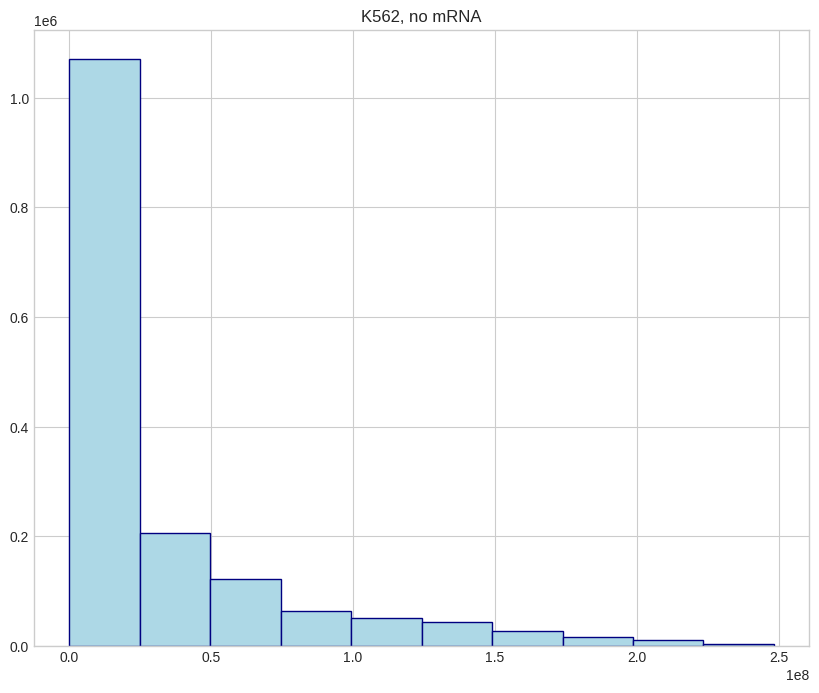

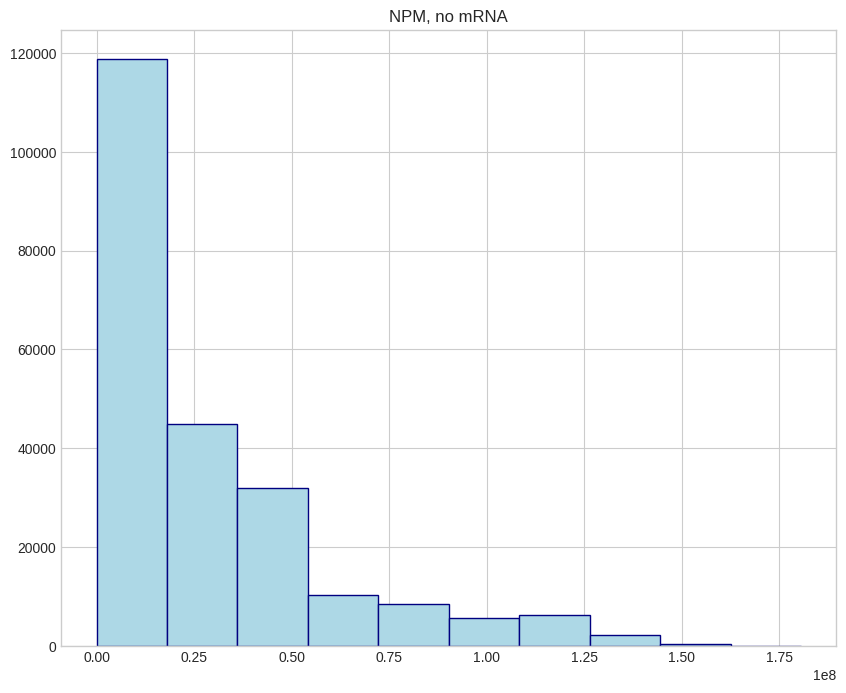

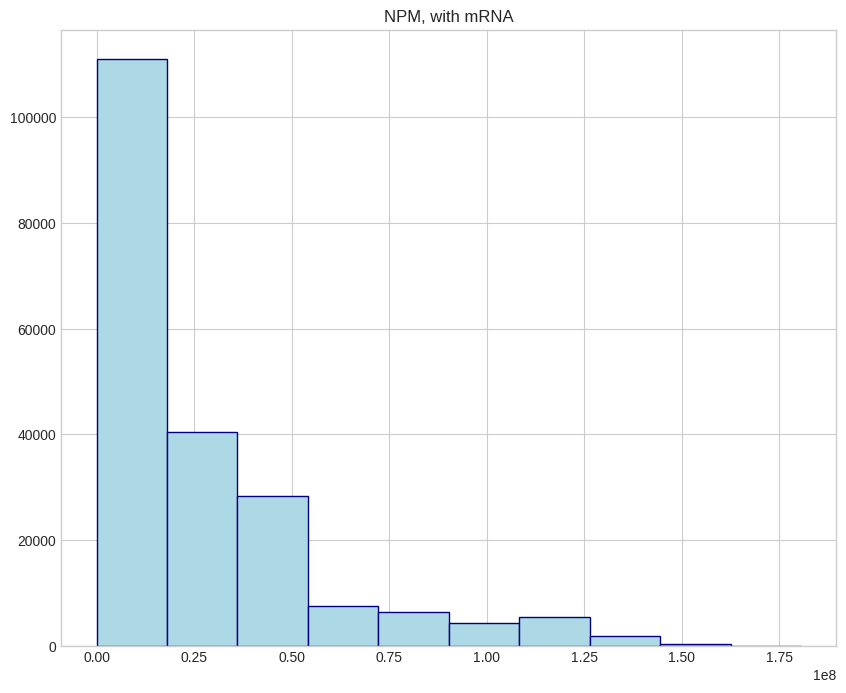

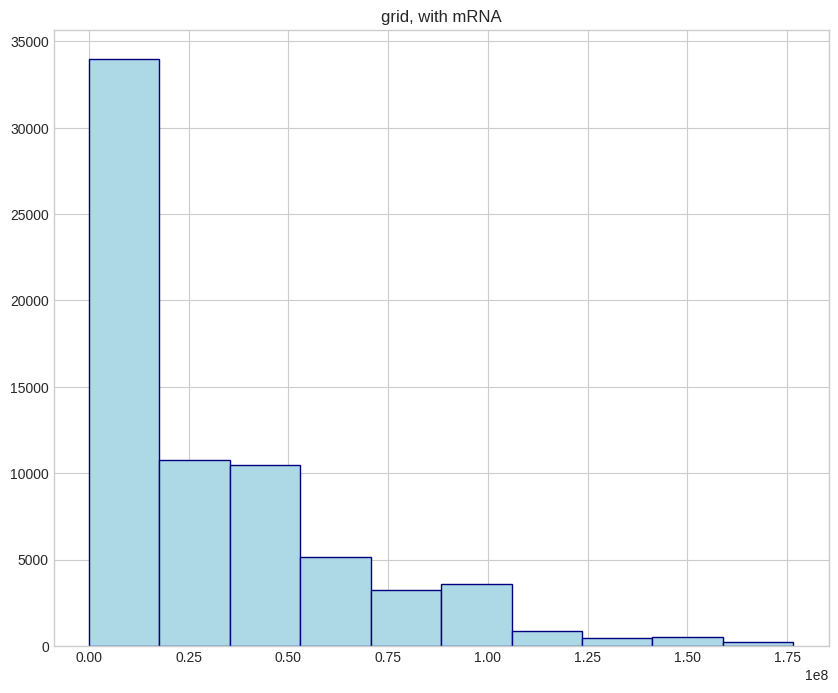

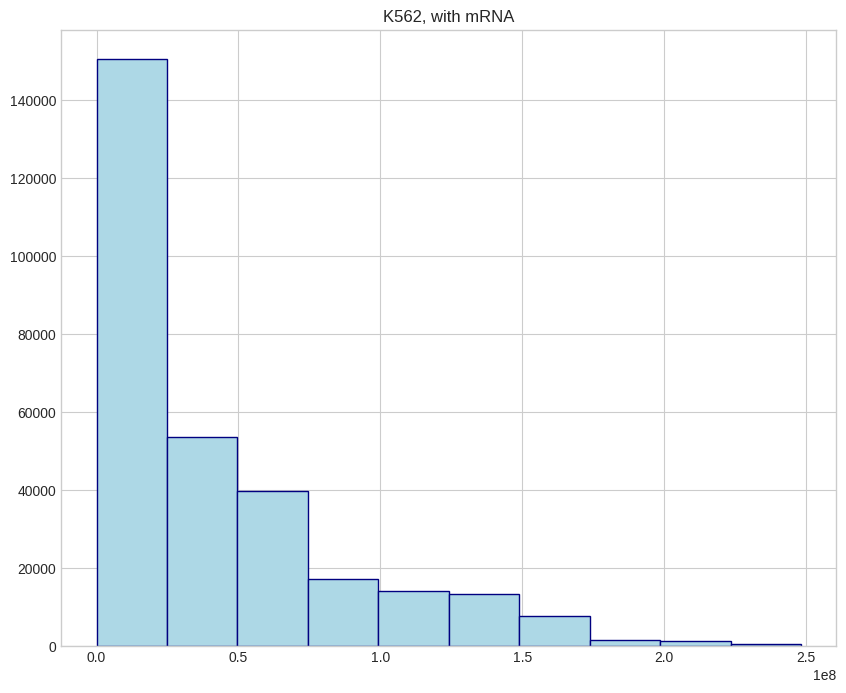

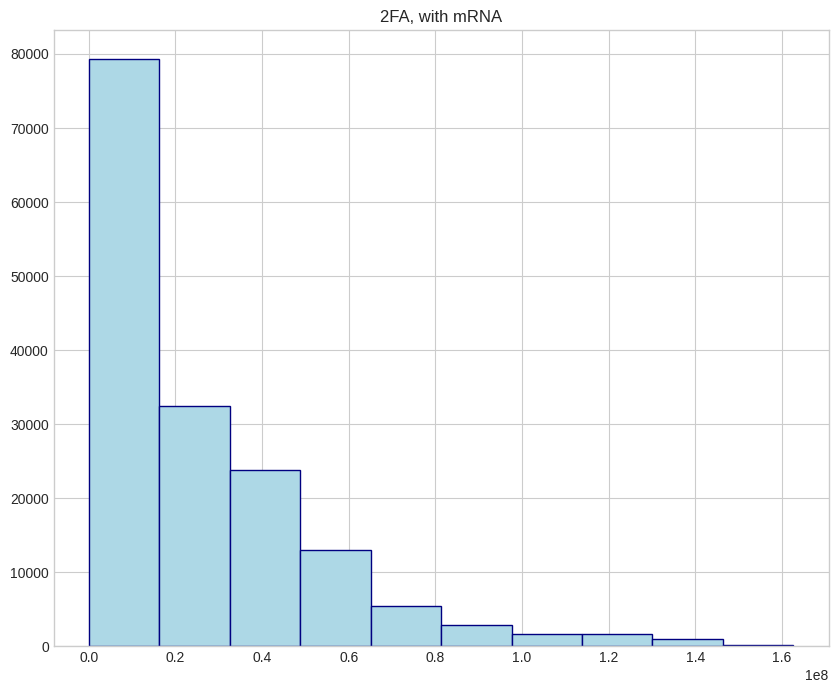

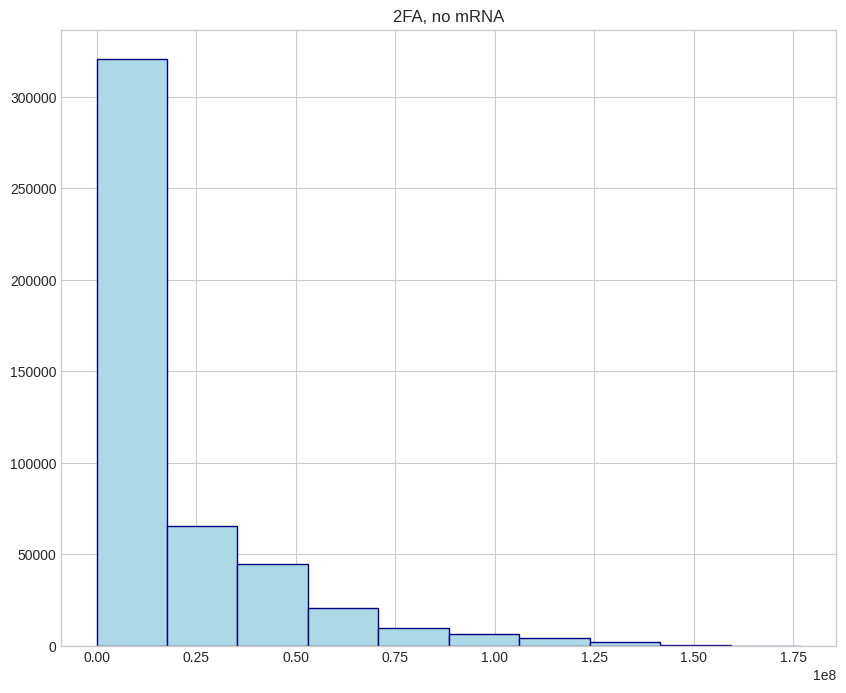

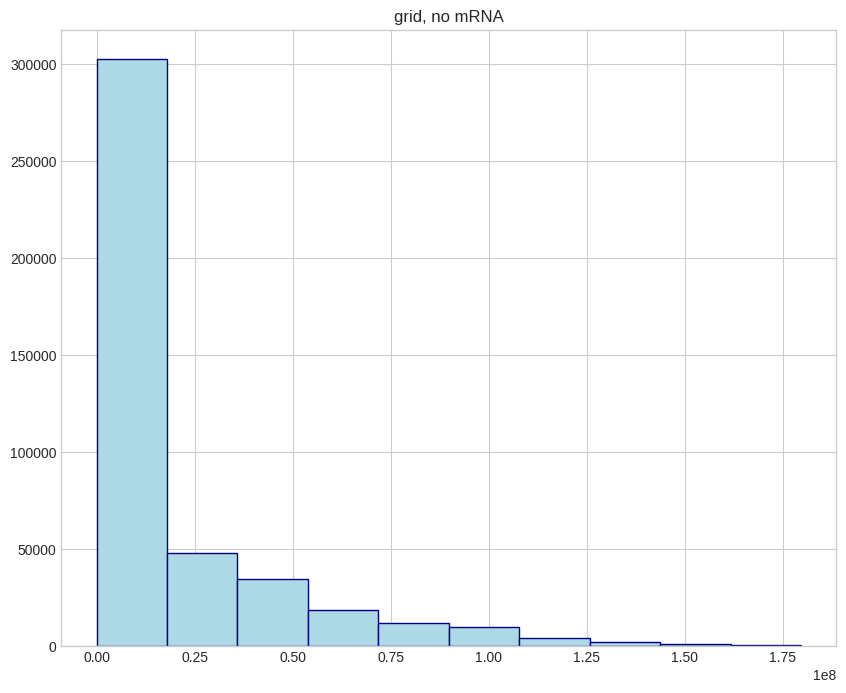

In [11]:
for fname in glob.glob("*tsv"):
    prot_cd = fname.find("no_mRNA") != -1
    experiment = fname.split('.')[0].split('_')[-1]
    organism = "K562" if experiment == "K562" else "mESC"
    
    draw_full(fname, prot_cd, experiment, organism)
    

### Попытка сделать графики как у Насти

Text(0.5, 1.0, 'Normalized contact number per bin')

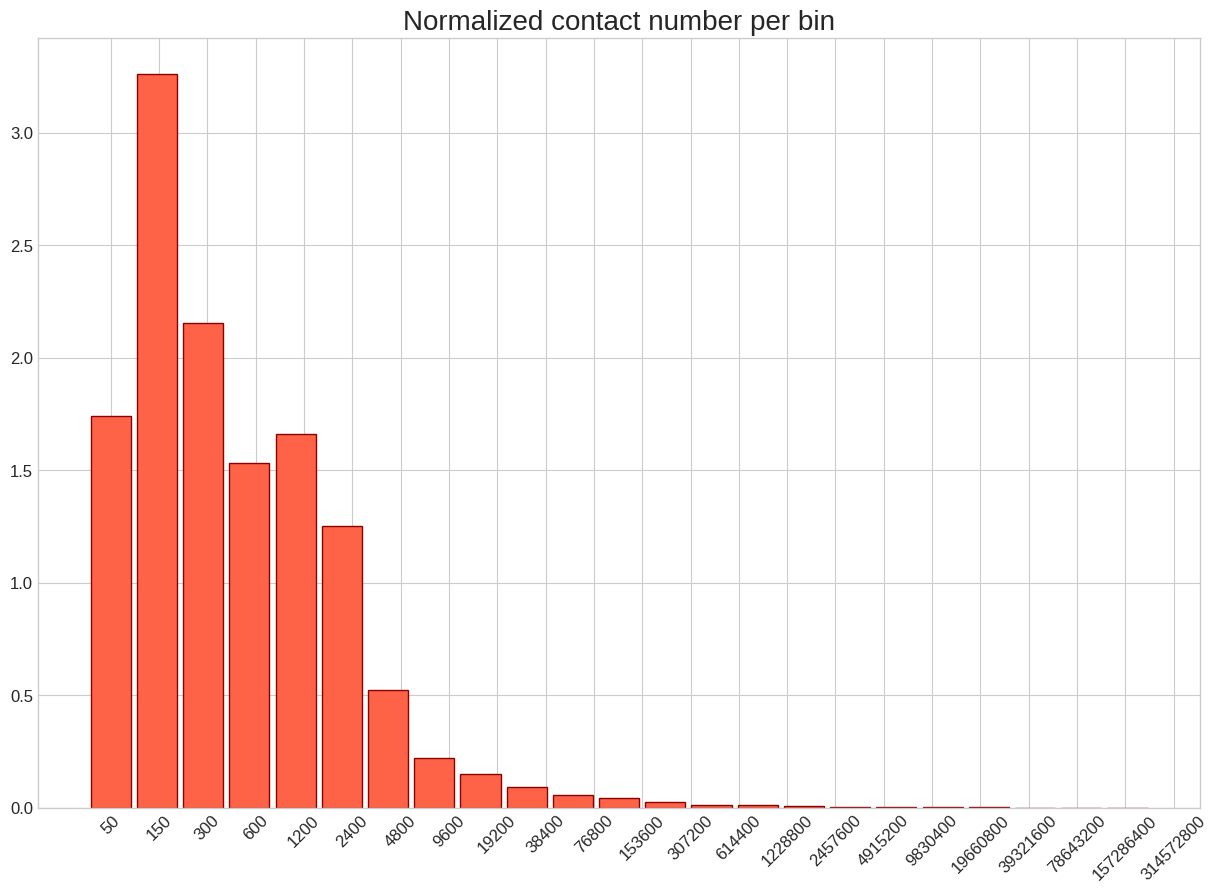

In [7]:
def binning(column):
    
    pts = [50 * 2**k for k in range(81)]
    
    res = []
    for dist in column:
        k = 0
        while pts[k] < dist:
            k += 1
        res.append(pts[k-1])
    res = np.log10(np.array(res, dtype="float"))
    return pd.Series(res)

df = pd.read_table("cis_no_mRNA_Red-C.K562.tsv", header=None).rename(
        columns={0:"rna_chr", 1:"rna_start", 2:"rna_end", 
                 3:"rna_strand", 4:"dna_chr", 5:"dna_start",
                 6:"dna_end"})
df["distance"] = np.abs(df.rna_start - df.dna_start)
df["bins"] = binning(df.distance)

pts = np.array([50 * 2**k for k in range(81)], dtype='float')
lbls = [int(pts[0])] + [int(pts[i] + pts[i-1]) for i in range(1, 23)]
H, bins = np.histogram(df.bins, bins=23)
H = np.histogram(df.bins, bins=23)[0]

plt.figure(figsize=(15, 10))
plt.bar(bins[:-1], H / lbls, width=0.25, ec="darkred", color="tomato")
plt.xticks(np.log10(pts[:23]), labels=lbls, rotation=45, fontsize=12)
plt.tick_params(which='both', axis='y', labelsize=12)
plt.title("Normalized contact number per bin Red-C", fontsize=20)

#plt.suptitle("Red-C K562", fontsize=30)
#plt.show()

In [17]:
def plot_scaling(fname):
    
    def parse_fname(fname):
        organism = fname.split('.')[1]
        exp = fname.split('.')[0].split('_')[-1]
        protcoding = "with protein_coding" if fname.split('_')[1] == "w" else "no protein_coding"
        
        return organism, exp, protcoding
    
    def binning(column):

        pts = [50 * 2**k for k in range(81)]

        res = []
        for dist in column:
            k = 0
            while pts[k] < dist:
                k += 1
            res.append(pts[k-1])
        res = np.array(res, dtype="float")
        res[res > pts[22]] = pts[22]
        res = np.log10(res)
        return pd.Series(res)
    
    org, ex, pc = parse_fname(fname)
    df = pd.read_table(fname, header=None).rename(
            columns={0:"rna_chr", 1:"rna_start", 2:"rna_end", 
                     3:"rna_strand", 4:"dna_chr", 5:"dna_start",
                     6:"dna_end"})
    df["distance"] = np.abs(df.rna_start - df.dna_start)
    df["bins"] = binning(df.distance)

    pts = np.array([50 * 2**k for k in range(81)], dtype='float')
    lbls = [int(pts[0])] + [int(pts[i] + pts[i-1]) for i in range(1, 23)]
    H, bins = np.histogram(df.bins, bins=23)
    H = np.histogram(df.bins, bins=23)[0]

    print(pc)
    plt.figure(figsize=(15, 10))
    plt.bar(bins[:-1], H / lbls, width=0.25, ec="darkred", color="tomato")
    plt.xticks(np.log10(pts[:23]), labels=lbls, rotation=45, fontsize=12)
    plt.tick_params(which='both', axis='y', labelsize=12)
    plt.title(f"{ex} in {org}", fontsize=30)

    plt.show()
    
    return

with protein_coding


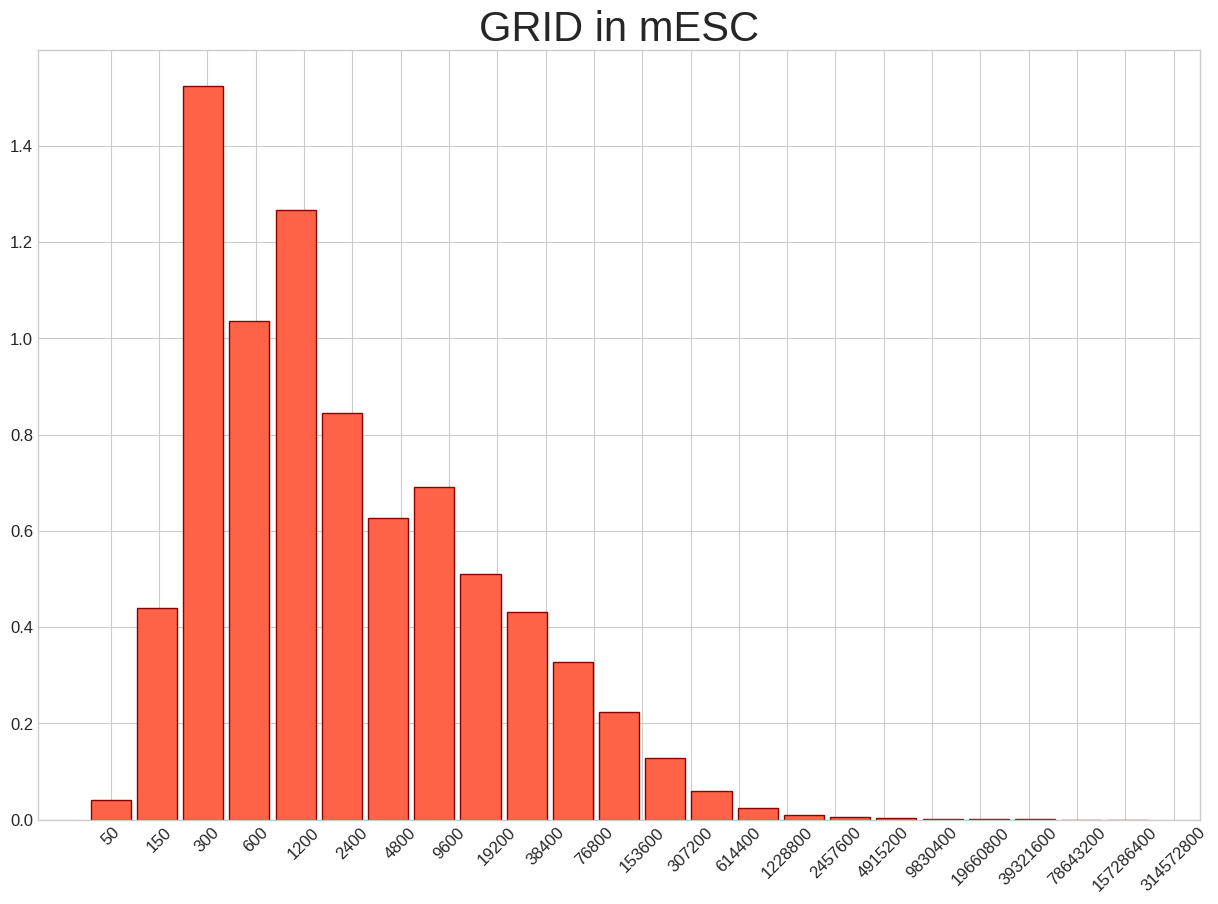

with protein_coding


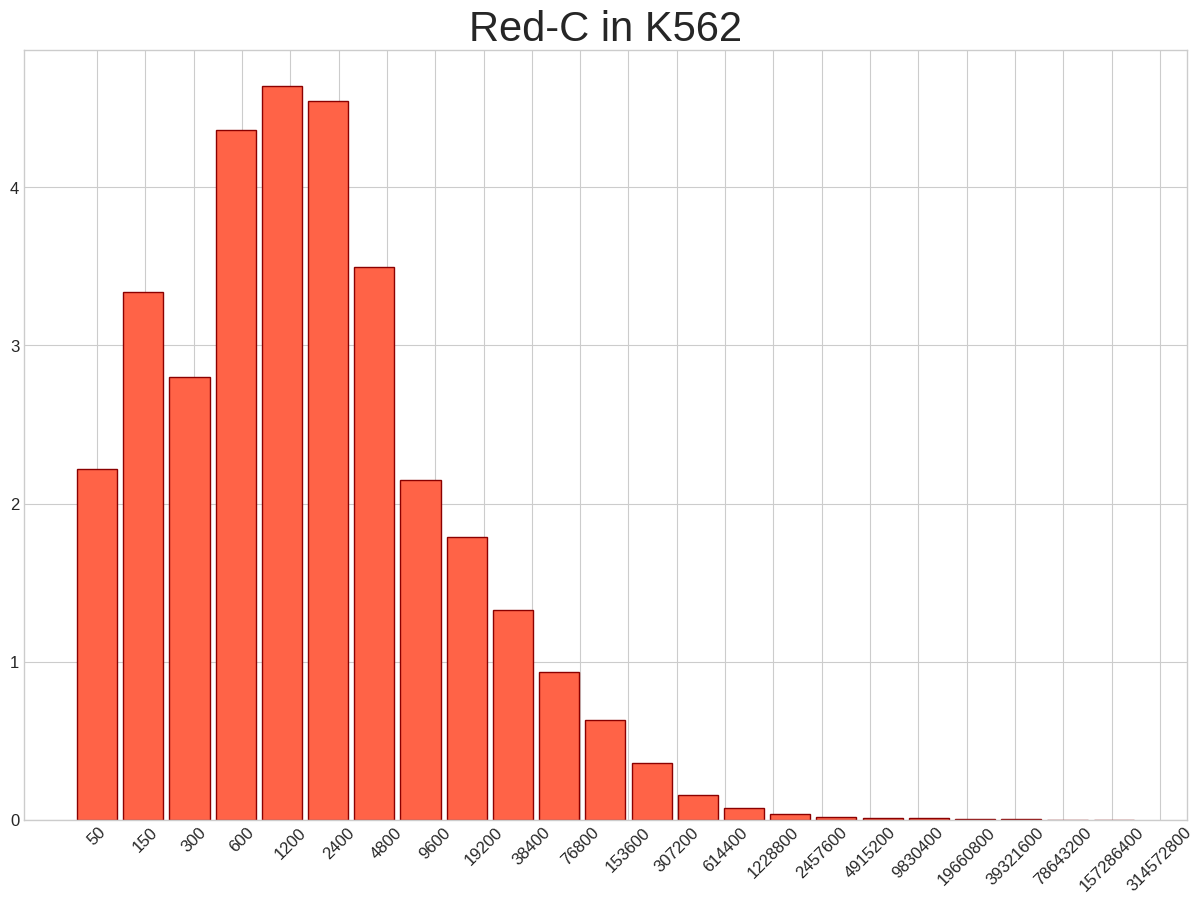

no protein_coding


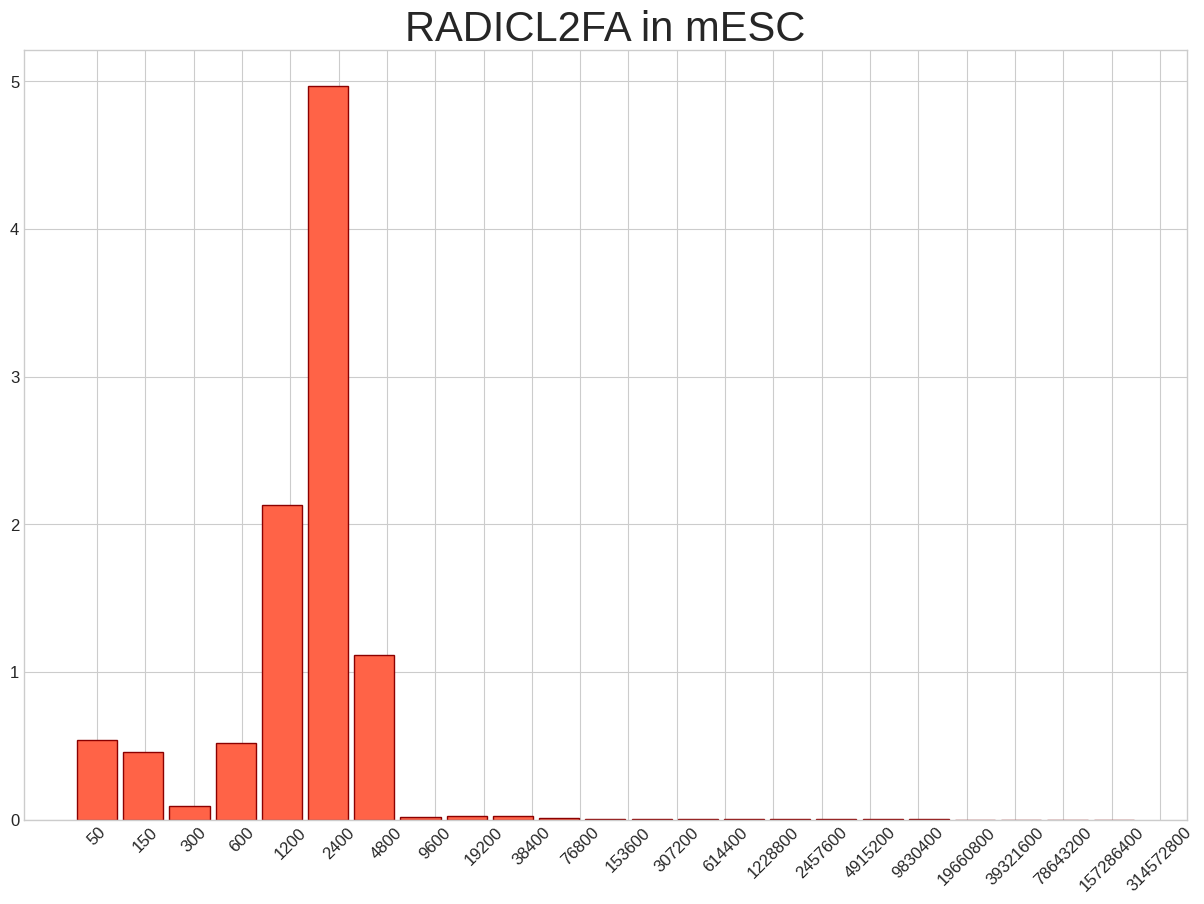

with protein_coding


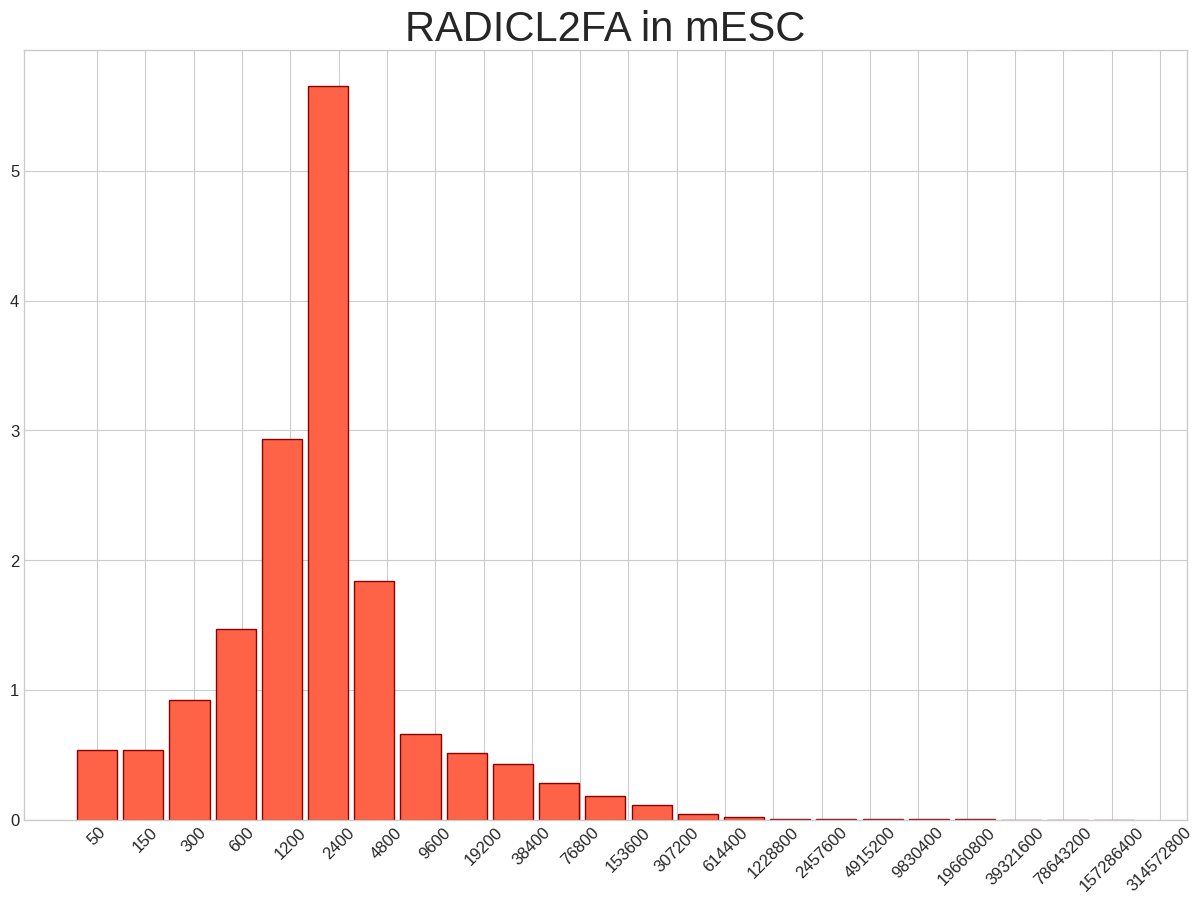

no protein_coding


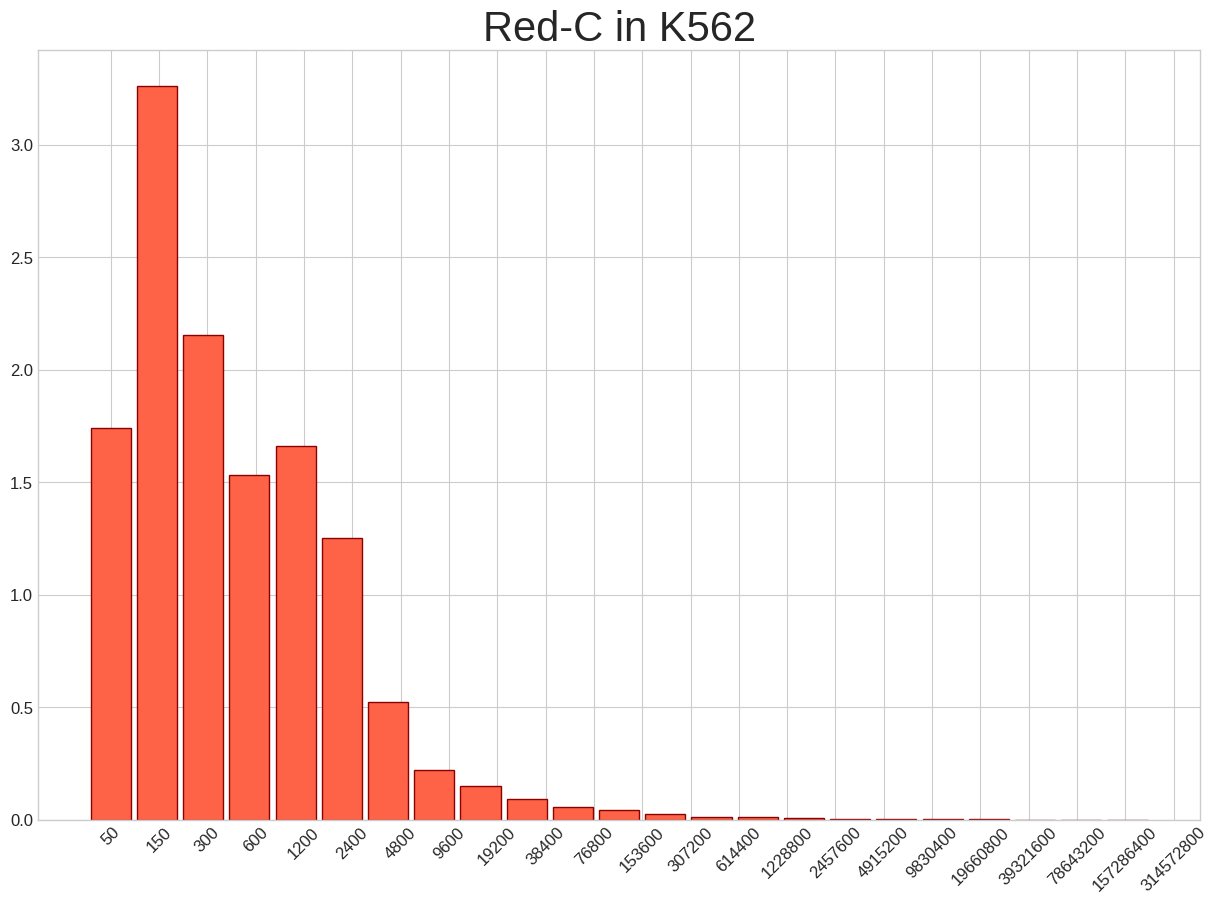

no protein_coding


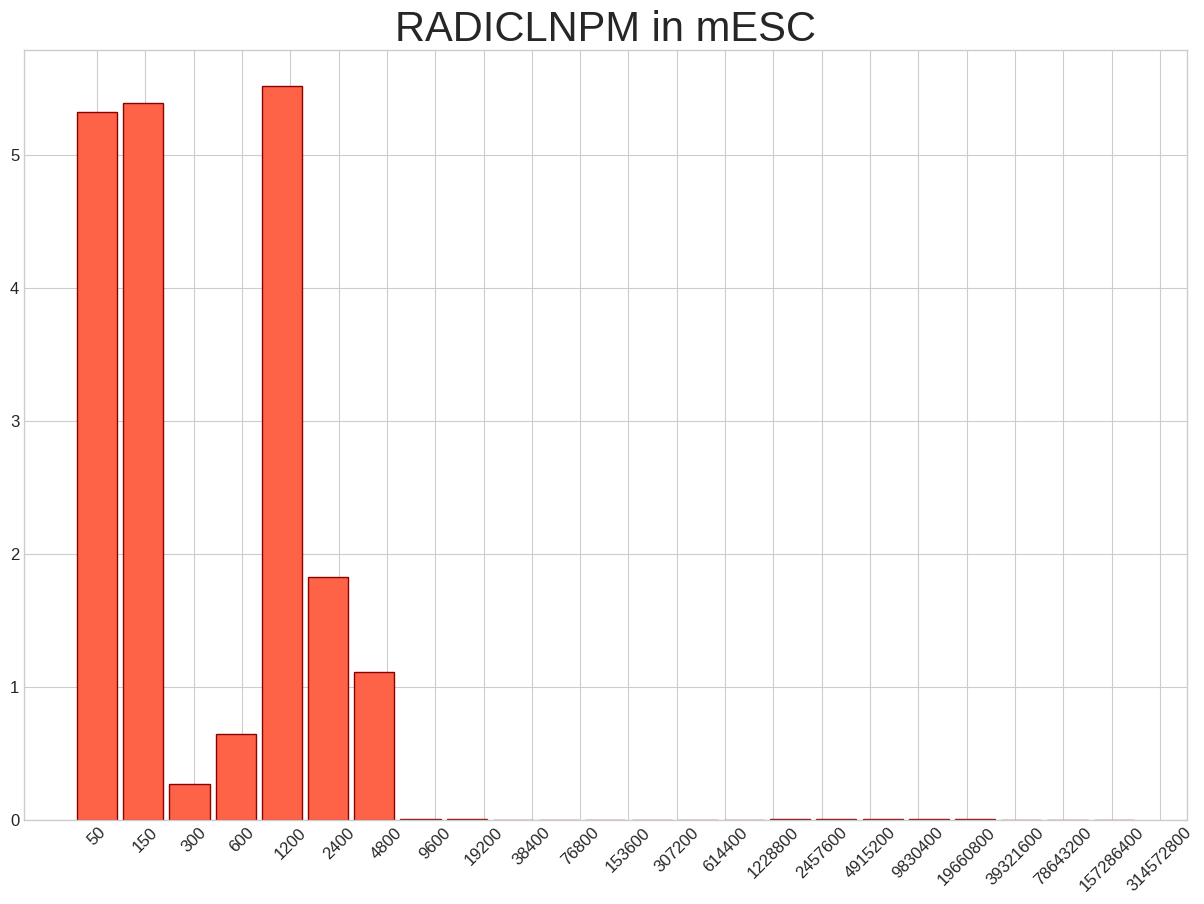

with protein_coding


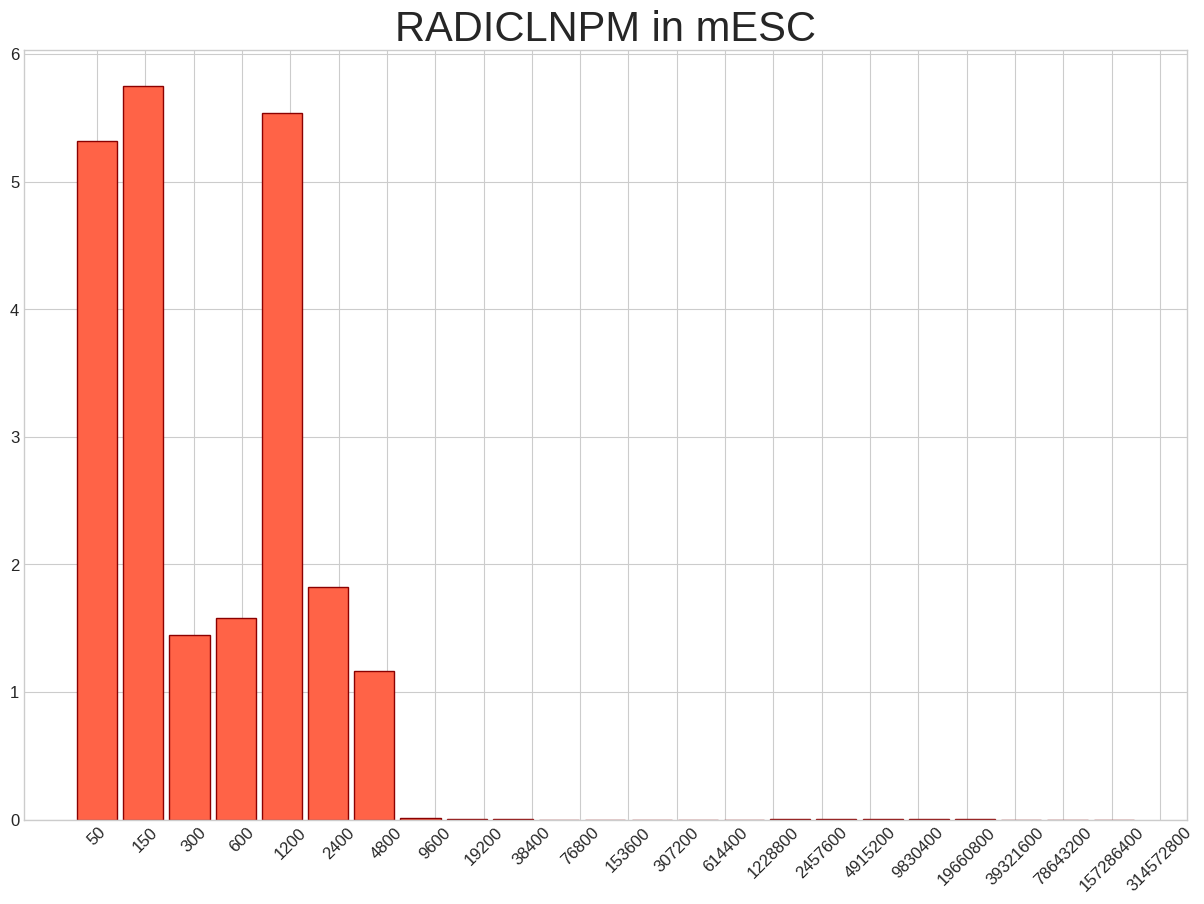

no protein_coding


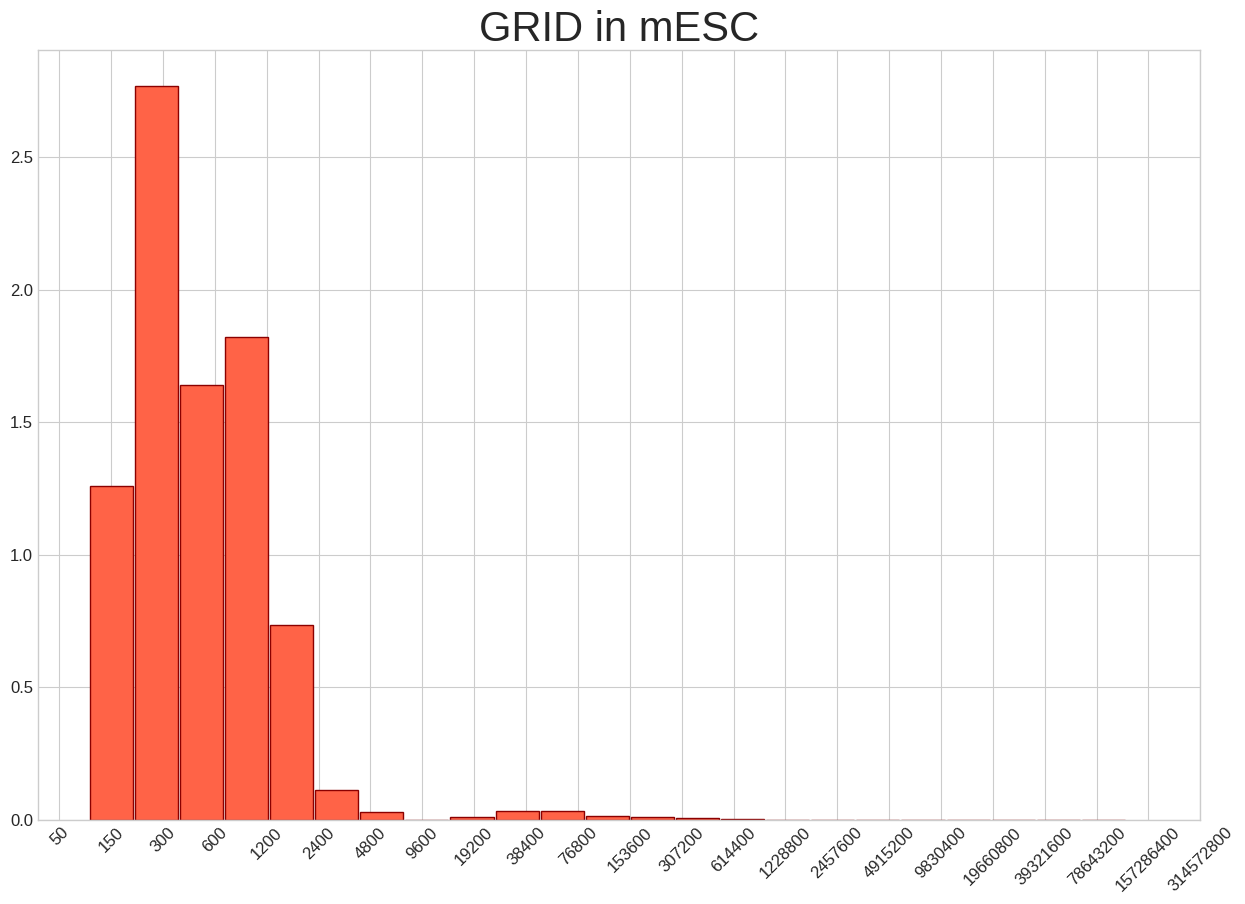

In [18]:
for file in glob.glob("*tsv"):
    plot_scaling(file)